# Buiseness Statement

### To predict if a patient has any cardiovascular disease or not.

# Import basic libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('values.csv')

# Basic Checks

In [4]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [5]:
data.columns.value_counts()

patient_id                              1
slope_of_peak_exercise_st_segment       1
thal                                    1
resting_blood_pressure                  1
chest_pain_type                         1
num_major_vessels                       1
fasting_blood_sugar_gt_120_mg_per_dl    1
resting_ekg_results                     1
serum_cholesterol_mg_per_dl             1
oldpeak_eq_st_depression                1
sex                                     1
age                                     1
max_heart_rate_achieved                 1
exercise_induced_angina                 1
Name: count, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [7]:
data.shape

(180, 14)

In [8]:
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

In [9]:
data.exercise_induced_angina.unique()

array([0, 1], dtype=int64)

In [10]:
data.exercise_induced_angina.value_counts()

exercise_induced_angina
0    123
1     57
Name: count, dtype: int64

In [11]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [12]:
data.describe(include='O') # categorical data

,patient_id,thal
count,180,180
unique,180,3
top,0z64un,normal
freq,1,98


# Numerical Features Insights:
### Slope of Peak Exercise ST Segment:
* Average slope: ~1.55 (values range from 1 to 3). Most patients have a lower slope, which could indicate reduced blood flow during exercise.

### Resting Blood Pressure:
* Average: 131.31 mmHg (normal range: ~120/80 mmHg).
* Minimum: 94 mmHg; Maximum: 180 mmHg.
* A significant number of patients have elevated resting blood pressure, as indicated by the 75th percentile (140 mmHg).

### Chest Pain Type:
* Median: 3 (value range: 1 to 4). Indicates most patients report asymptomatic chest pain or typical angina.

### Number of Major Vessels (fluoroscopy):
* Average: 0.69 vessels.
* Most patients have 0 vessels (25th and 50th percentile).

### Fasting Blood Sugar > 120 mg/dl:
* Binary feature with a mean of ~0.16, indicating a small percentage of patients have high fasting blood sugar levels.

### Resting EKG Results:
* Median: 2; 50% of patients show a major abnormality (value 2).

### Serum Cholesterol:
* Average: 249.21 mg/dl (normal range: <200 mg/dl).
* Maximum: 564 mg/dl, suggesting severe hyperlipidemia in some patients.

### Oldpeak (ST Depression):
* Median: 0.8; some patients exhibit significant ST depression (max: 6.2), indicating ischemia.

### Sex:
* Binary feature with a mean of ~0.69, indicating ~69% of the patients are male.

### Age:
* Average: 54.81 years.
* Majority are middle-aged (25th percentile: 48, 75th percentile: 62).

### Max Heart Rate Achieved:
* Average: 149.48 bpm.
* Some patients achieve significantly lower rates (min: 96 bpm), possibly due to cardiovascular issues.

### Exercise-Induced Angina:
* Binary feature with a mean of ~0.32, indicating ~32% of patients report angina during exercise.

# Categorical Features Insights:
### Patient ID:
* Each entry is unique; no duplicates in the dataset.

### Thal:
* Top value: "normal" with a frequency of 98, indicating most patients have normal thallium stress test results.
* Categories: "normal," "fixed_defect," "reversible_defect."

# Exploratory Data Analysis

## Univariate Analysis

In [18]:
import sweetviz as sv 
my_report = sv.analyze(data)
# Display the report as an HTML file
my_report.show_html("Sweetviz_Report.html")


                                             |                                             | [  0%]   00:00 ->…

Report Sweetviz_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Insights from Sweetviz

### High Risk Features:
* Resting blood pressure (mean: 131.31 mmHg) and serum cholesterol (mean: 249.21 mg/dl) suggest a significant portion of the dataset may have elevated risk factors for heart disease.
* Oldpeak (mean: 1.01) indicates potential heart issues, with some patients showing a high level of ST depression (max: 6.2), which suggests abnormal heart function.

### Age Group:
* The mean age is 54.81 years, indicating a predominantly middle-aged population, which is a high-risk group for heart disease.

### Exercise-Induced Angina:
* 32% of the patients experience exercise-induced chest pain, a strong indicator of heart disease risk.

### Thallium Stress Test (Thal):
* Most patients have normal results (98 occurrences), but the presence of fixed and reversible defects indicates some degree of cardiovascular abnormalities.

### Fasting Blood Sugar:
* 16% of the patients have fasting blood sugar > 120 mg/dl, indicating potential diabetes or metabolic issues, which increase heart disease risk.

### Class Imbalance:
* target variable has (1: True, 0: False), the dataset may have imbalanced classes, which could affect model training and may require techniques like SMOTE or class weighting.

### Chest Pain Types:
* Chest pain type is categorized into 4 types (1 to 4), with Type 3 being the most frequent. This indicates that many patients experience atypical chest pain, which is linked to heart disease.

### Age and Heart Disease Risk:
Age (mean: 54.81 years, min: 29, max: 77) is a key risk factor, with older individuals likely having a higher chance of heart disease. The age distribution should be checked to confirm the prevalence of heart disease among different age groups.

### Number of Major Vessels:
* Number of major vessels (range: 0 to 3) can provide insights into the severity of heart disease. A higher number of vessels may indicate more severe cardiovascular issues, which correlates with an increased risk of heart attack or stroke.

### Maximum Heart Rate Achieved:
* The max heart rate achieved (mean: 149.48 bpm, max: 202 bpm) is an important indicator of heart health. A high max heart rate achieved could suggest fitness or the ability to endure physical stress, but low max heart rates might signal underlying heart issues.

### Strong Correlations:
* There could be significant correlations between serum cholesterol and resting blood pressure, both of which contribute to heart disease risk.
* Oldpeak and exercise-induced angina are likely to be highly correlated, as both reflect abnormal heart responses to physical exertion.

### Outliers:
* Features like serum cholesterol and oldpeak show high max values (564 and 6.2), which could be outliers that affect model performance. These outliers may need to be handled via capping or transformation techniques.

### Imbalance in Risk Factors:
* The proportion of patients with high-risk factors such as fasting blood sugar > 120 mg/dl (16%) and exercise-induced angina (32%) suggests a sizable group with risk factors that are predictive of heart disease.

In [8]:
print(data.dtypes)

patient_id                               object
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
dtype: object


# Bivariate Analysis

In [13]:
# For categorical columns 
data1 = data[['patient_id','thal']]

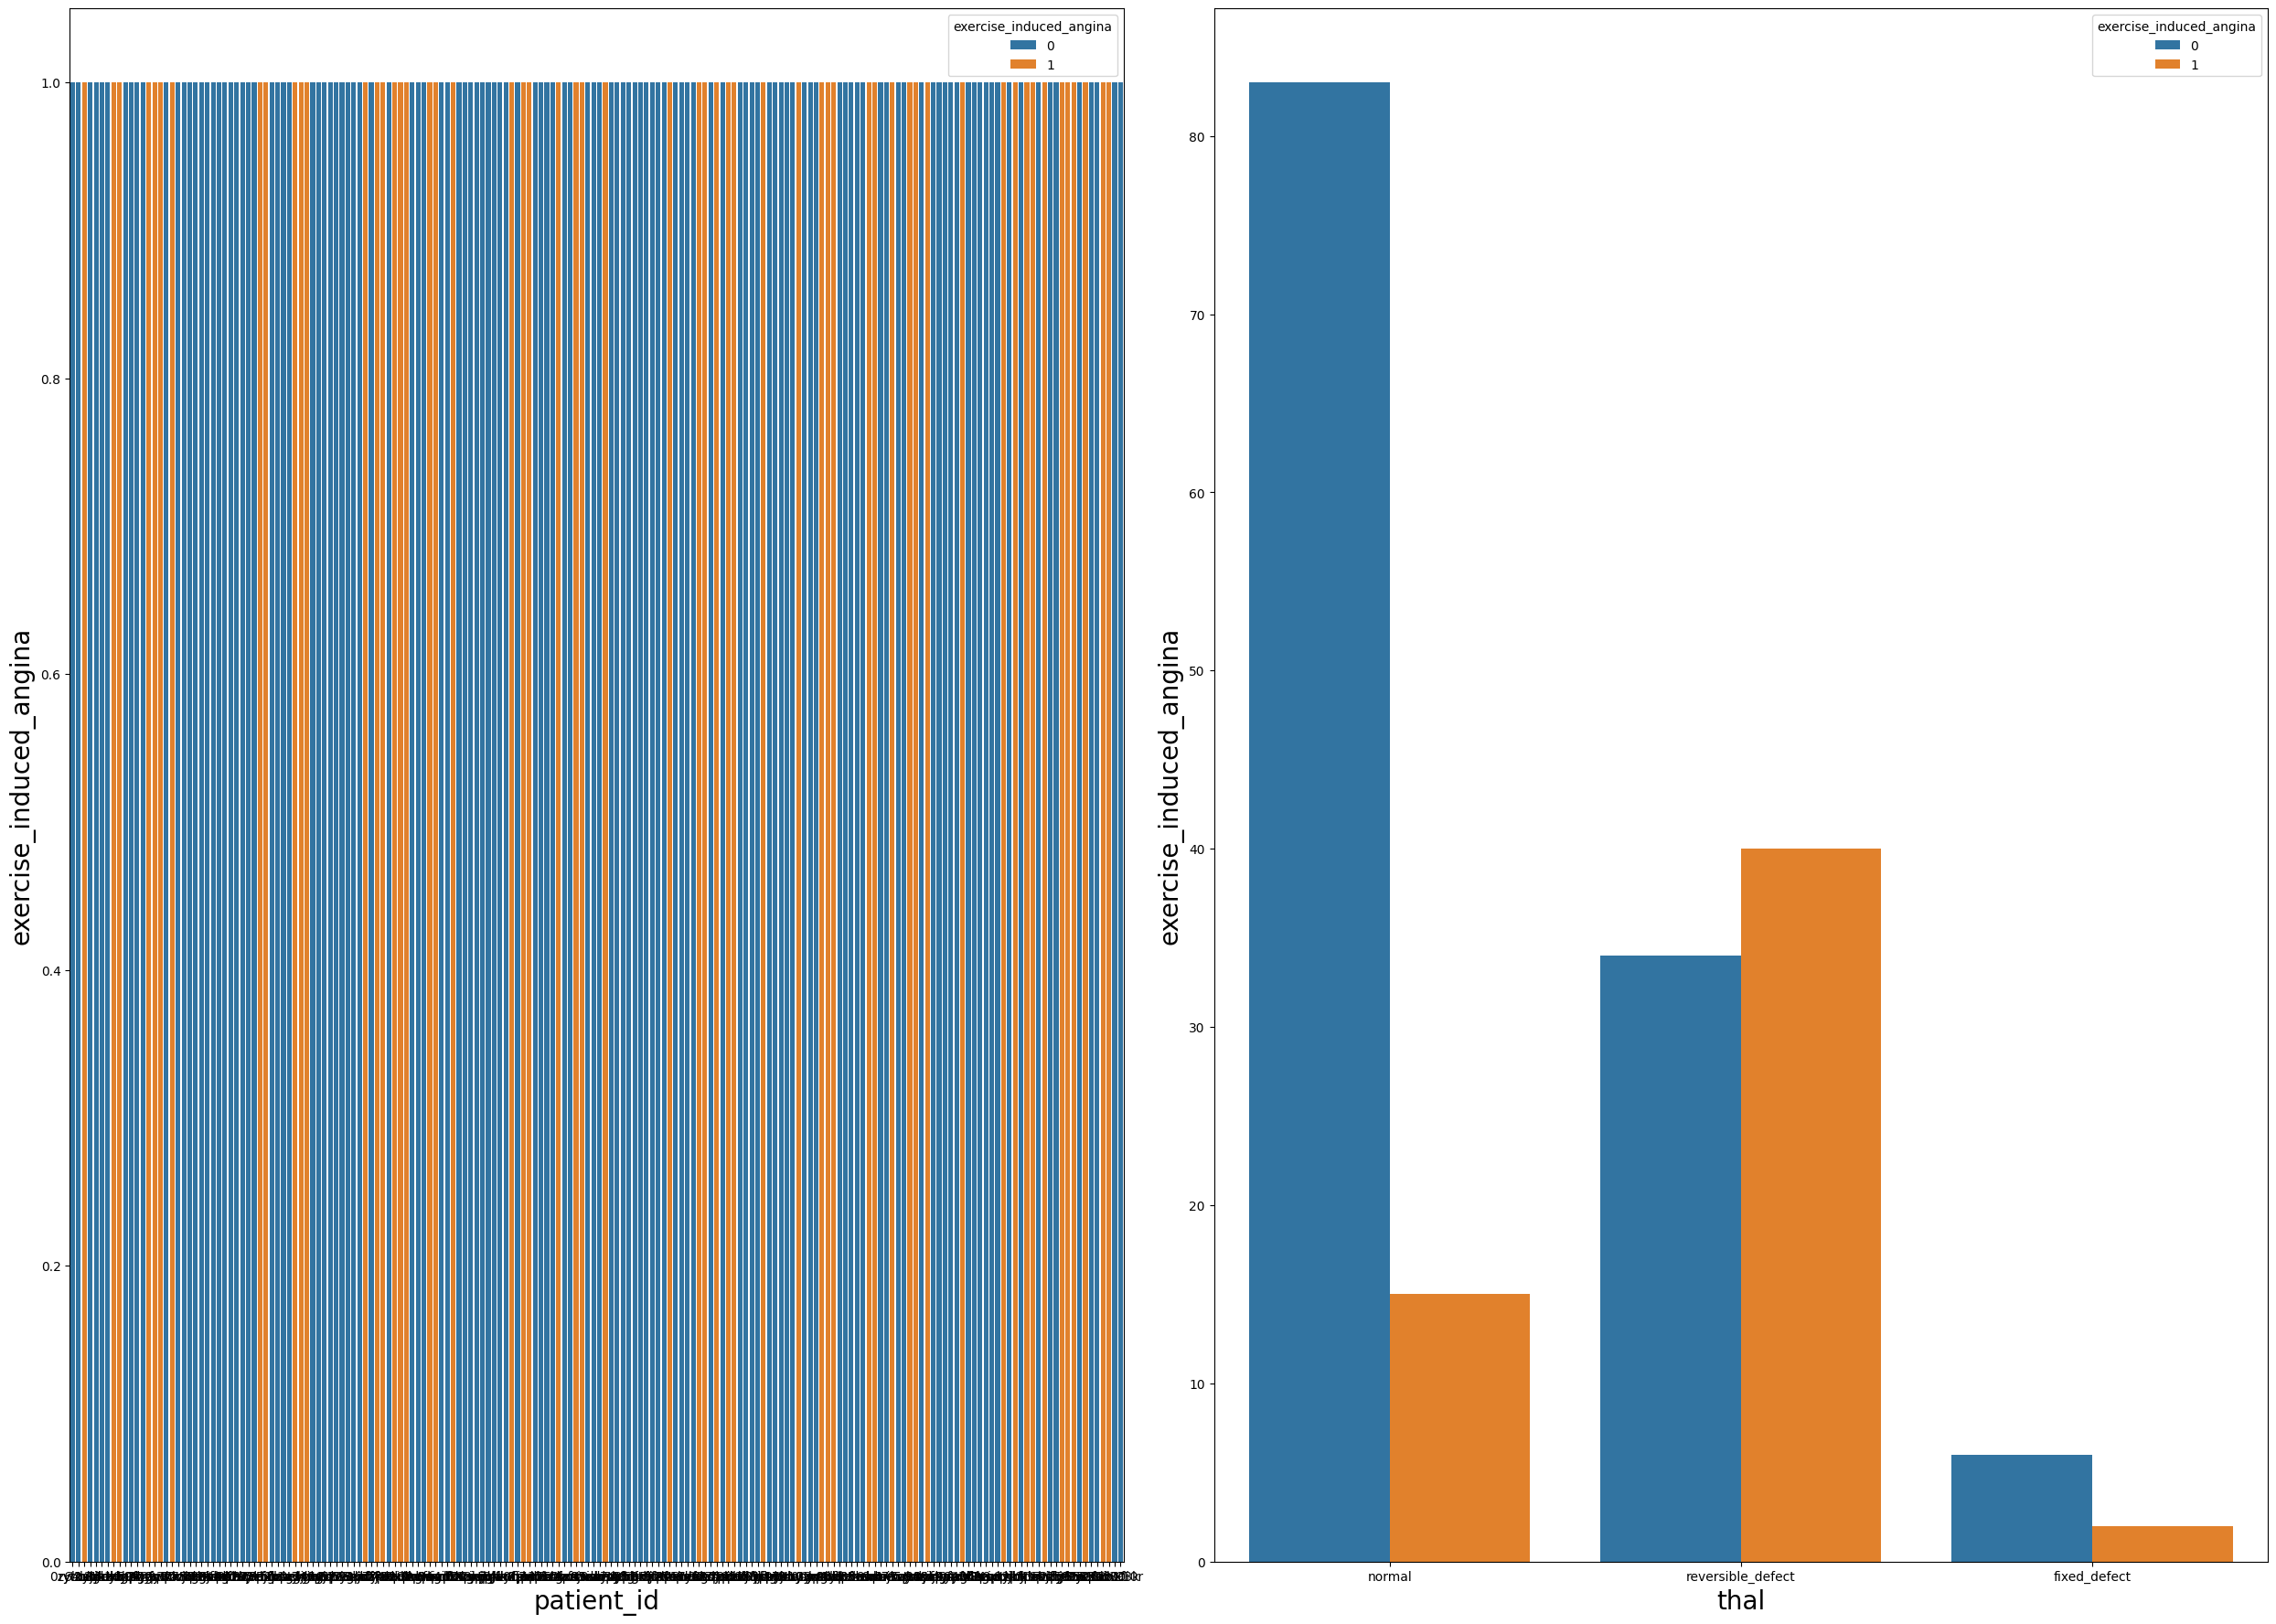

In [14]:
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in data1:
    if plotnumber<=2:
        ax=plt.subplot(2,2,plotnumber)
        sns.countplot(x=data1[column],hue=data['exercise_induced_angina'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('exercise_induced_angina',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [15]:
# For numerical columns 
data2 = data[['slope_of_peak_exercise_st_segment','resting_blood_pressure','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','sex','age','max_heart_rate_achieved']]

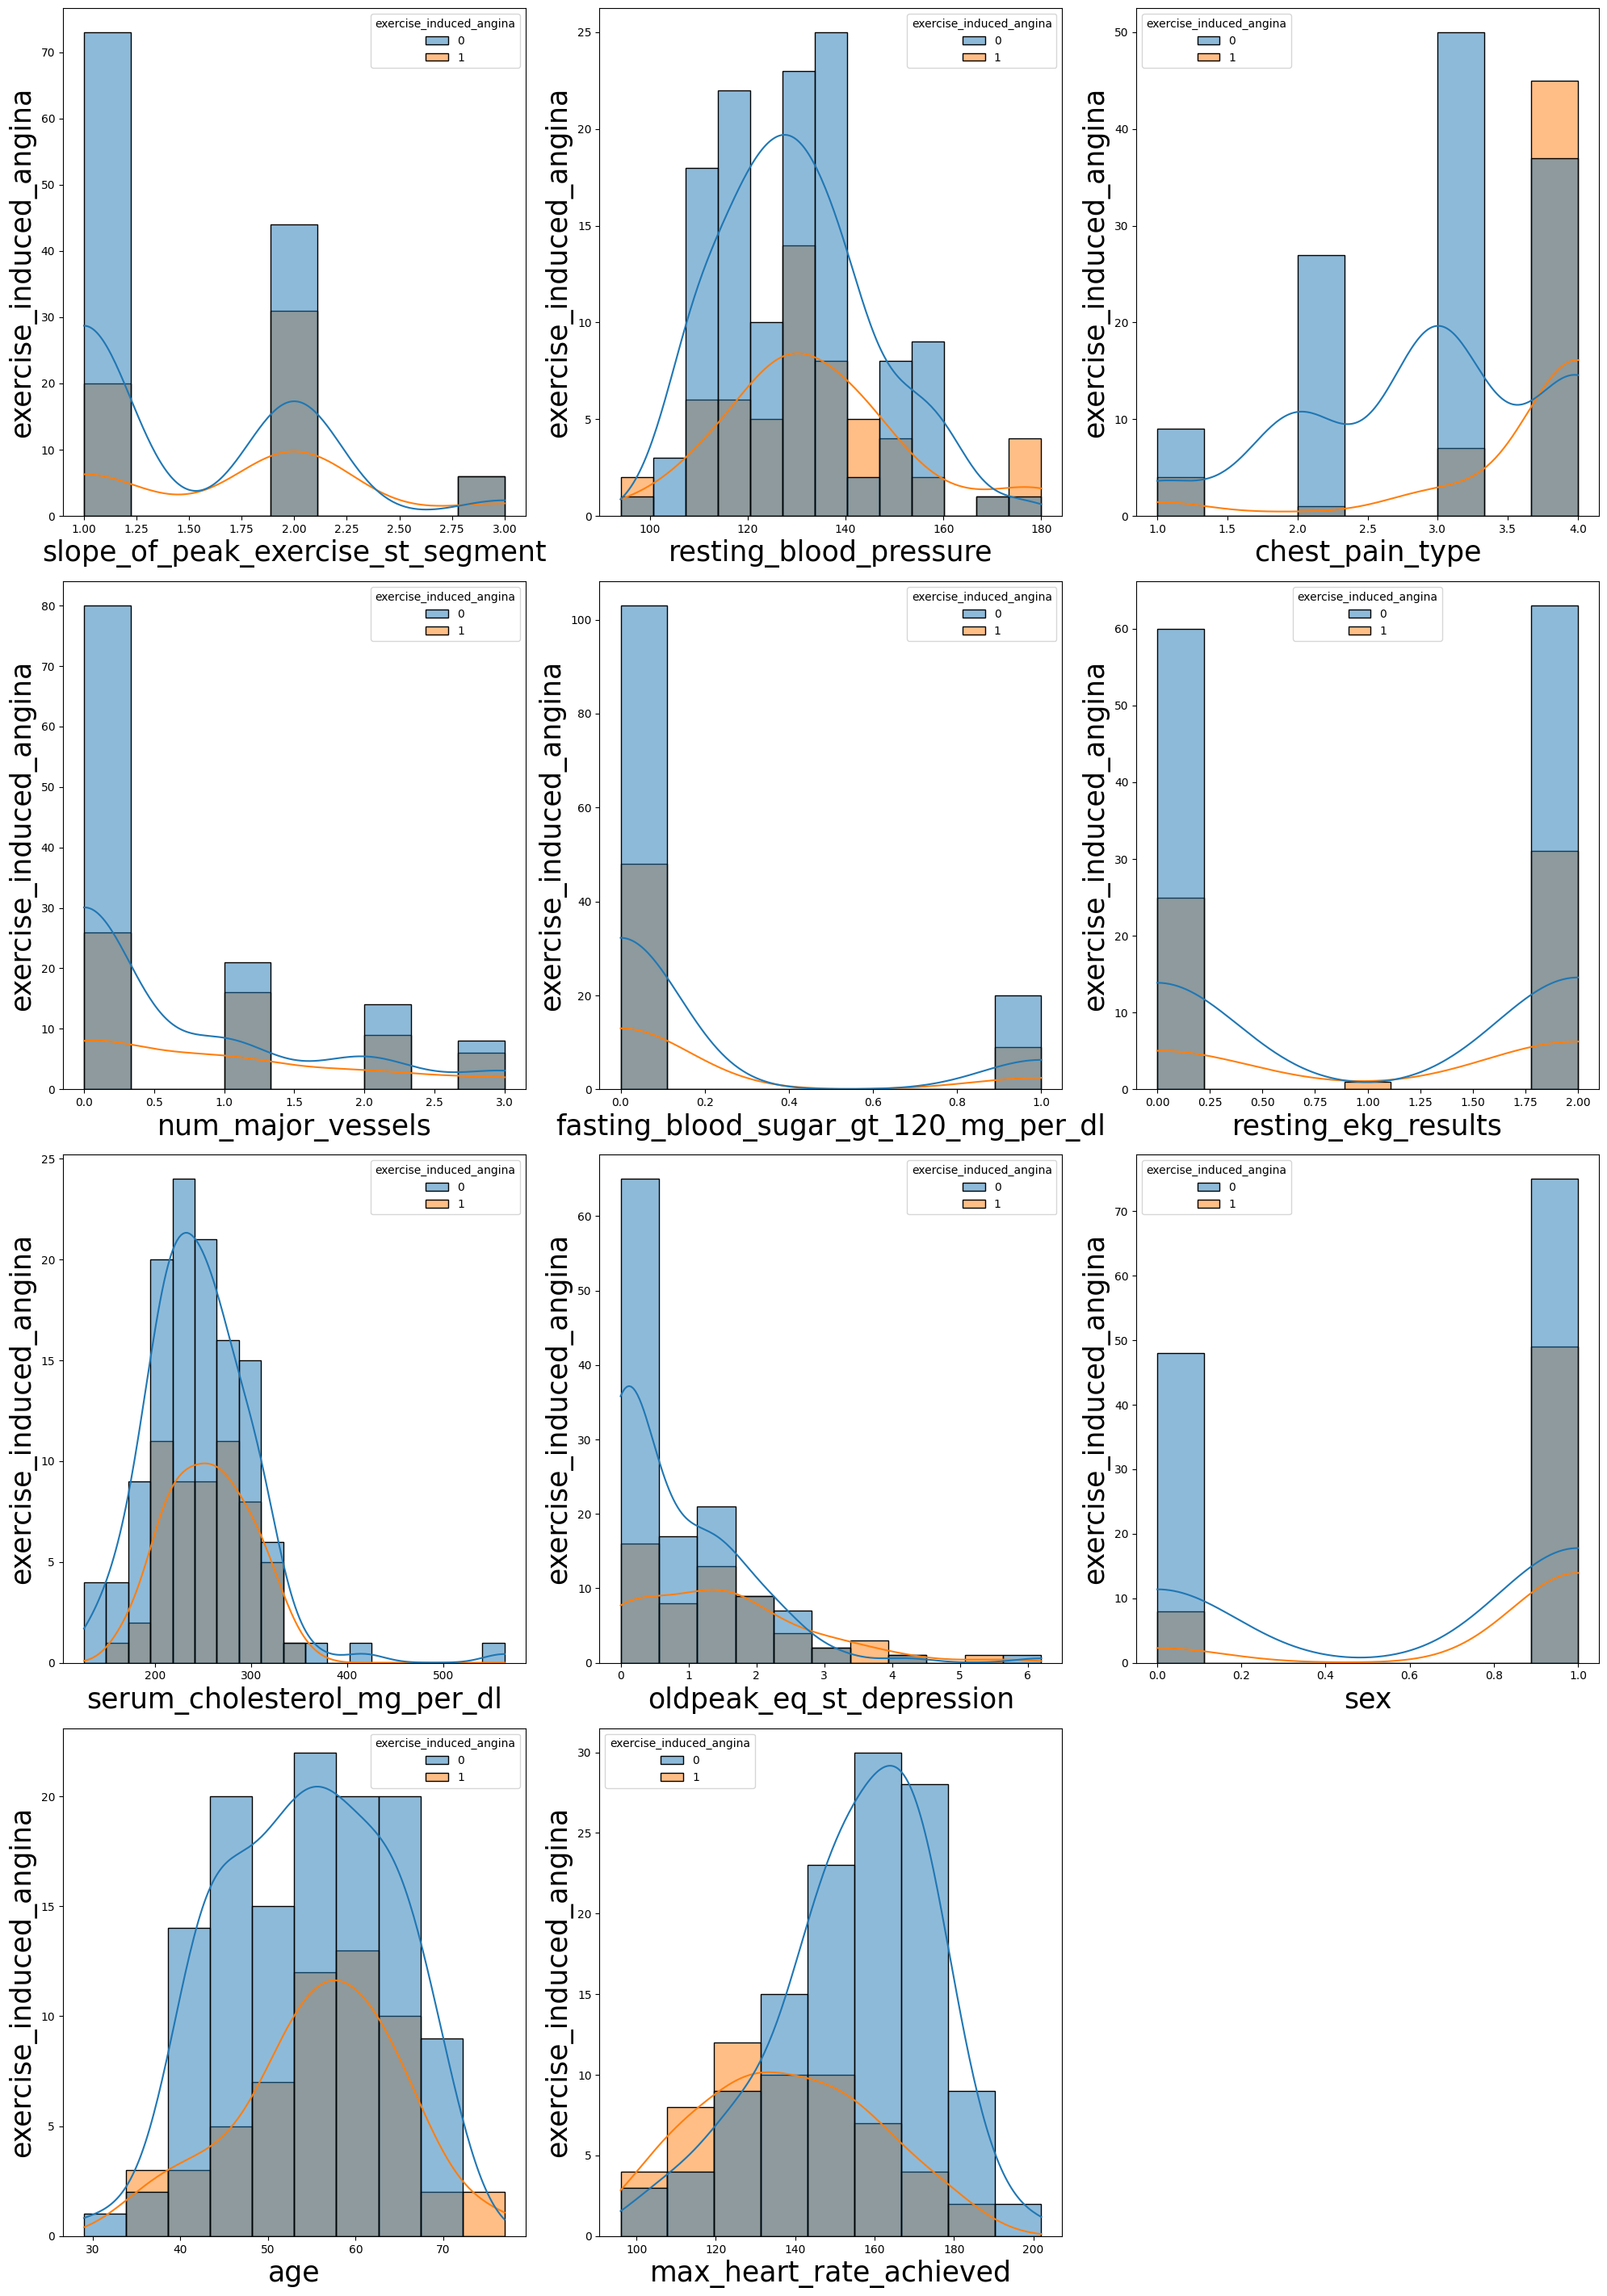

In [16]:
plt.figure(figsize=(20,35),facecolor='white')
plotnumber=1
for column in data2:
    if plotnumber<=11:
        ax=plt.subplot(5,3,plotnumber)
        sns.histplot(x=data2[column],hue=data['exercise_induced_angina'],kde=True)
        plt.xlabel(column,fontsize=25)
        plt.ylabel('exercise_induced_angina',fontsize=25)
    plotnumber+=1
plt.tight_layout()

### 1.Slope of Peak Exercise ST Segment:
* This feature shows the slope of the peak exercise ST segment, which is related to the quality of blood flow to the heart.
* Insight: If a higher proportion of exercise-induced angina occurs for individuals with a slope of 2 or 3, it indicates that a steeper or abnormal response in the exercise-induced electrocardiogram (ST segment) could be associated with a higher likelihood of chest pain during exercise, which is a possible sign of heart disease.

### 2. Resting Blood Pressure:
* Insight: Higher resting blood pressure might show a clear distinction between individuals with exercise-induced angina and those without. Elevated blood pressure is a significant risk factor for cardiovascular issues, and those with higher blood pressure may experience more chest pain during exercise due to increased heart workload.

### 3. Chest Pain Type:
* Insight: The chest_pain_type feature represents different types of chest pain (e.g., typical angina, atypical angina, non-anginal pain). If individuals with certain chest pain types experience more chest pain during exercise, it could suggest that these types of pain are associated with higher cardiovascular risk, which is evident in their increased likelihood of exercise-induced angina.

### 4. Number of Major Vessels:
* Insight: The num_major_vessels feature shows the number of major blood vessels with some degree of blockage or issues.
* Higher blockage (e.g., 2 or 3 vessels affected) could be associated with more severe heart disease and higher chances of exercise-induced angina.
* A lack of blockage (0 vessels) may show fewer cases of chest pain during exercise, indicating a healthier heart.

### 5. Fasting Blood Sugar > 120 mg/dl:
* Insight: Those with fasting blood sugar > 120 mg/dl are at higher risk for diabetes, which is a significant risk factor for cardiovascular diseases. If individuals with high blood sugar show a higher occurrence of exercise-induced angina, it reinforces the idea that diabetes and heart disease are closely linked.

### 6. Resting EKG Results:
* Insight: The resting_ekg_results feature shows results from an electrocardiogram at rest.
* If exercise-induced angina is more prevalent in individuals with abnormal EKG results (e.g., resting_ekg_results = 1 or 2), it suggests that heart abnormalities at rest are linked to greater likelihood of chest pain during physical activity.

### 7. Serum Cholesterol:
* Insight: Elevated levels of serum cholesterol (especially > 240 mg/dl) are a known risk factor for heart disease. If individuals with higher cholesterol levels tend to experience more exercise-induced angina, it validates cholesterol as a key predictor of heart disease and related symptoms.

### 8. Oldpeak (ST Depression):
* Insight: The oldpeak_eq_st_depression feature, which measures ST depression during exercise relative to rest, is often used to identify heart abnormalities.
* A higher oldpeak value (indicating more depression) in those with exercise-induced angina suggests that ST depression is a significant indicator of heart disease and chest pain during exercise.

### 9. Sex (Gender):
* Insight: Male individuals (represented by 1) may show a higher frequency of exercise-induced angina, as men are generally at higher risk for cardiovascular diseases compared to women. Gender differences in heart disease risk can often be observed in such datasets.

### 10. Age:
* Insight: Older individuals might exhibit higher instances of exercise-induced angina, as age is a major risk factor for heart disease. You may see a stronger occurrence of chest pain during exercise in older age groups.

### 11. Max Heart Rate Achieved:
* Insight: Lower max heart rate achieved could be indicative of underlying heart issues. If patients who achieve a lower max heart rate during exercise tend to experience more exercise-induced angina, this could point to a reduced ability of the heart to cope with physical stress, possibly signaling heart disease.

# Multivariate Analysis

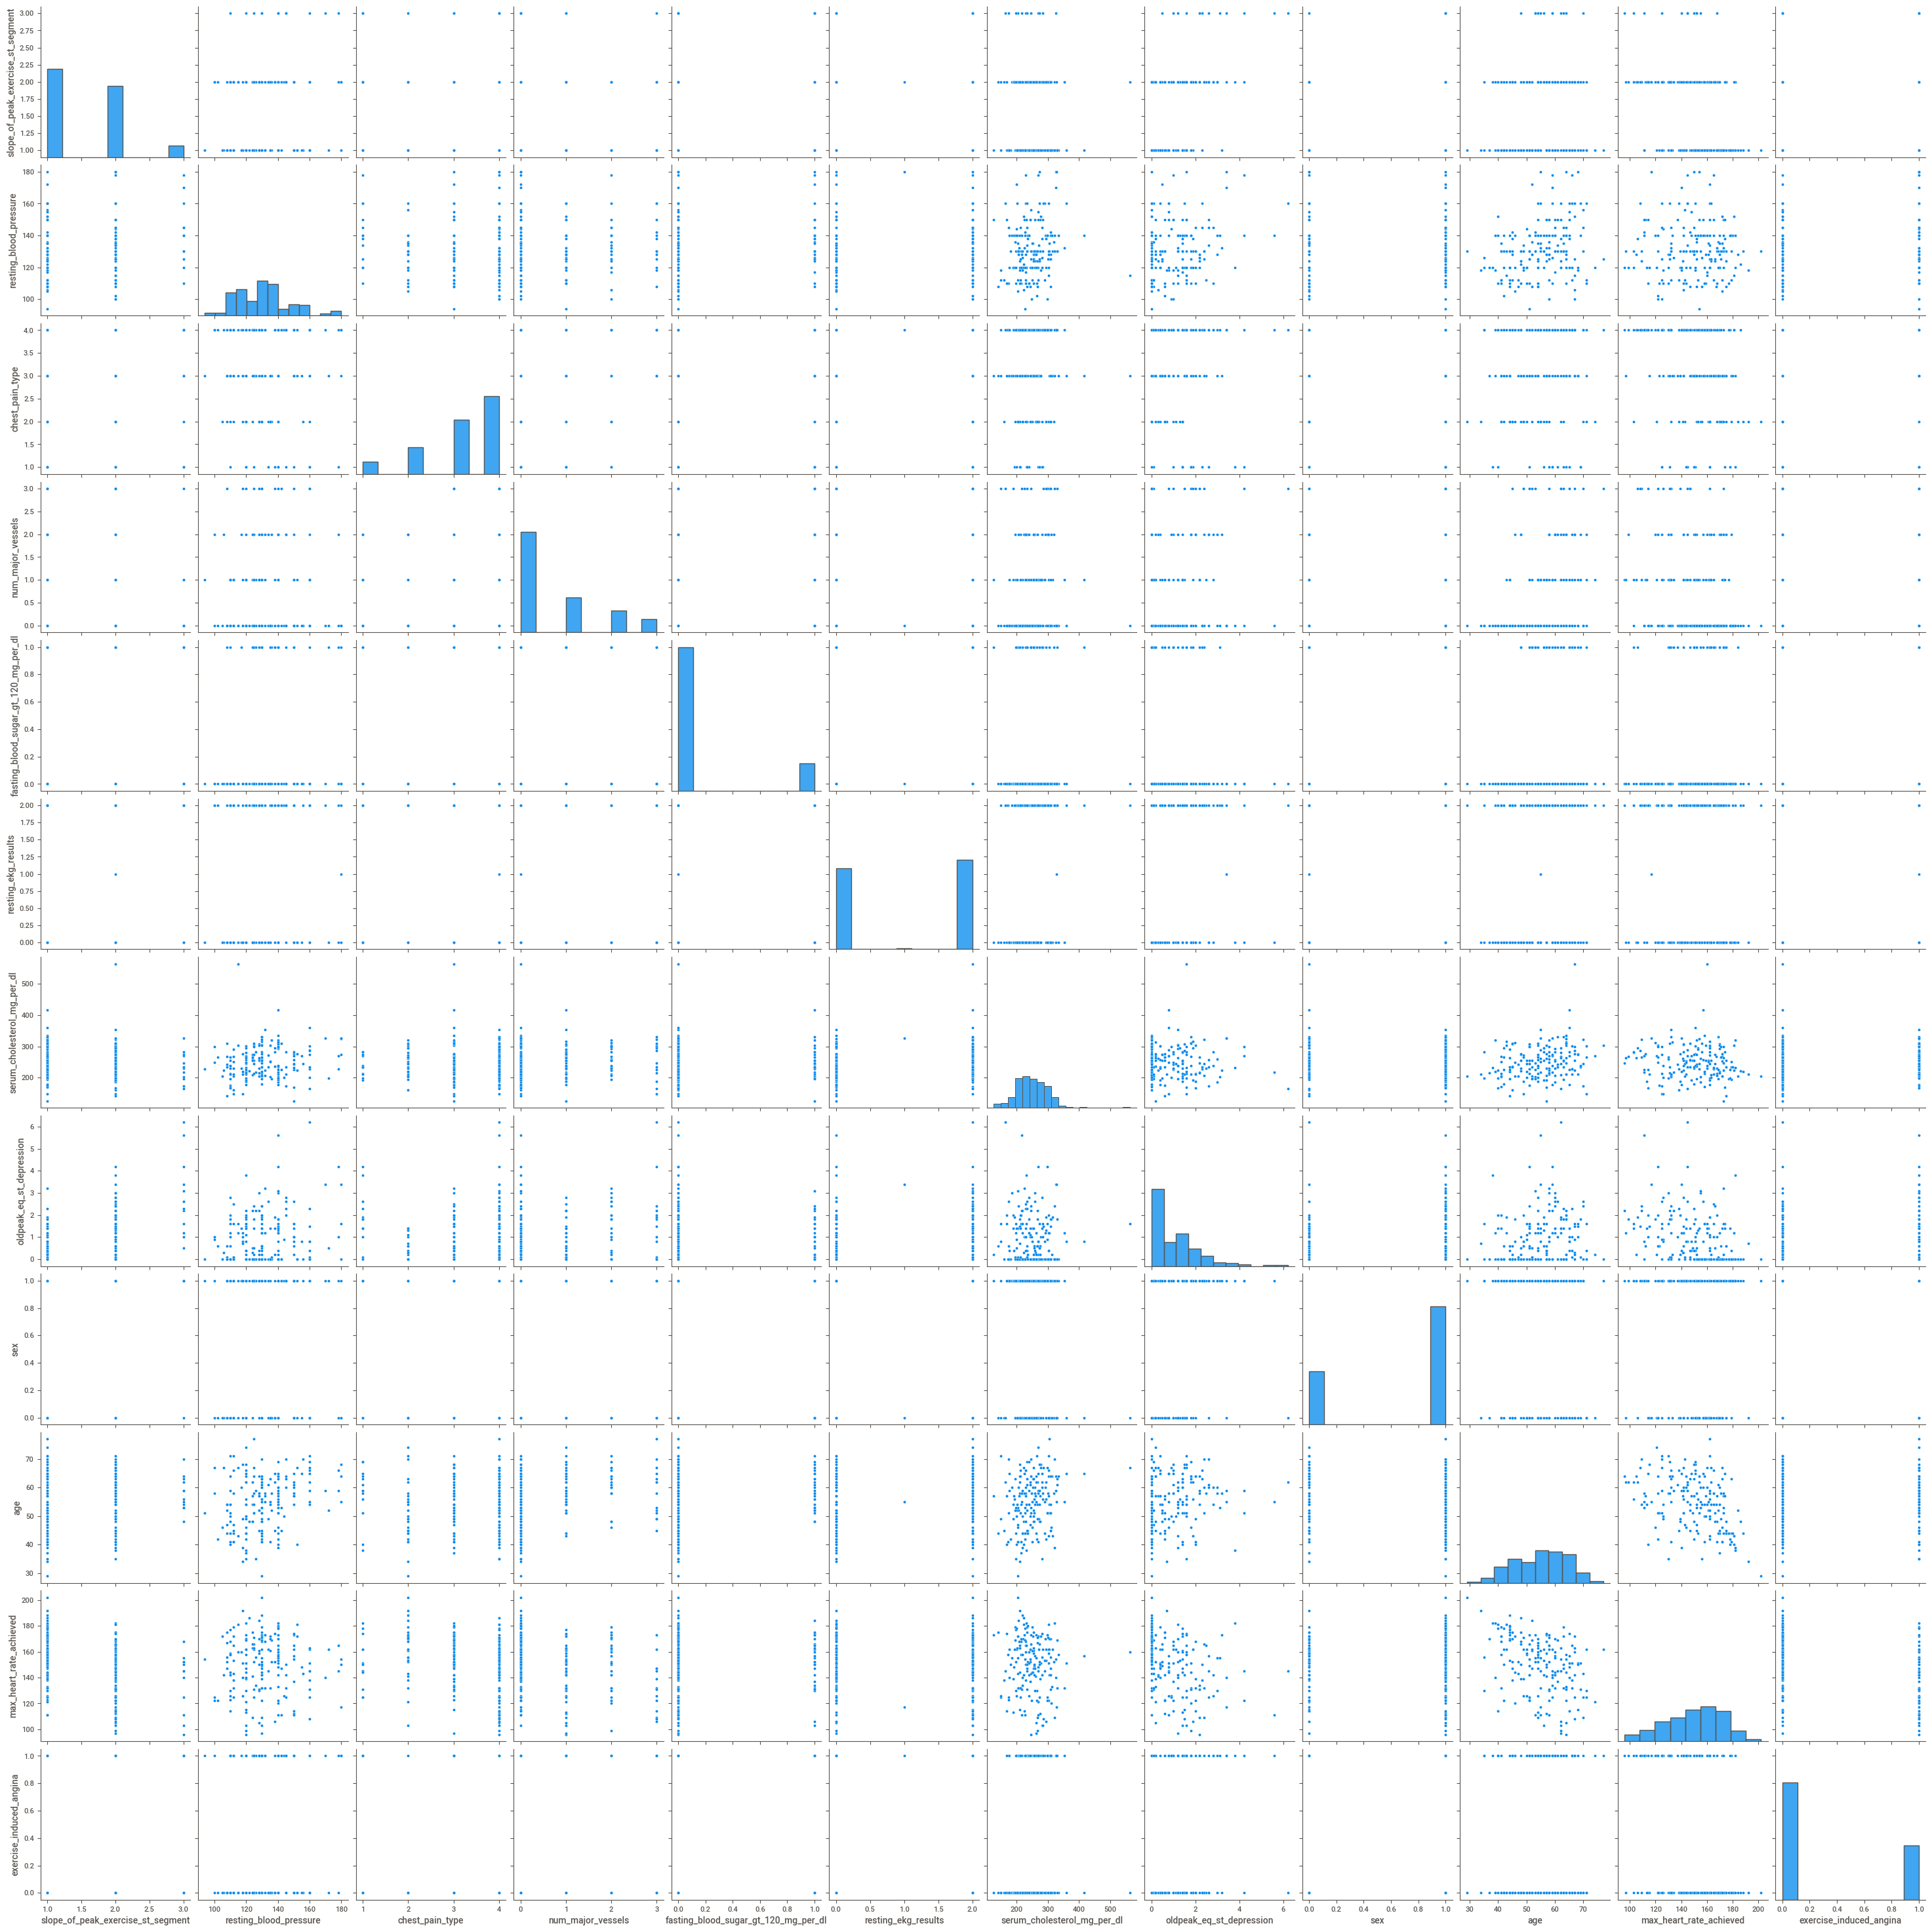

In [26]:
sns.pairplot(data)

# Data Preprocessing

In [17]:
data.isnull().sum() # no missing values

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

# Categorical to numerical

In [18]:
data3=data.copy()

In [19]:
data.select_dtypes(include='object').columns

Index(['patient_id', 'thal'], dtype='object')

### thal

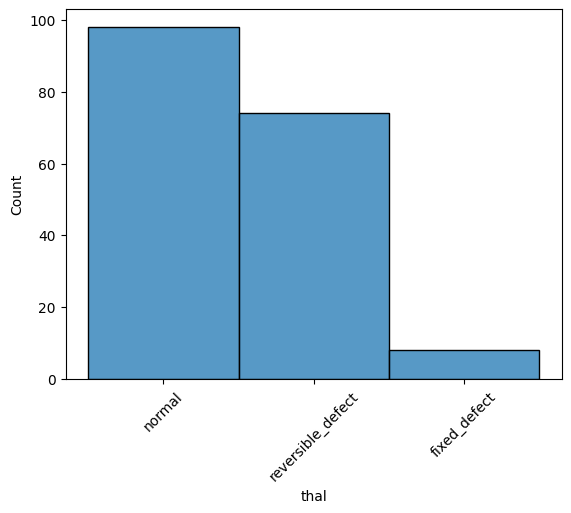

In [20]:
sns.histplot(x='thal',data=data3)
plt.xticks(rotation=45)
plt.show()

In [21]:
# Using manual encoding
data3['thal'] = data3['thal'].map({'normal':0,'reversible_defect':1,'fixed_defect':2})

In [22]:
data3.thal.value_counts()

thal
0    98
1    74
2     8
Name: count, dtype: int64

In [23]:
data3.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,0,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,0,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,0,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,1,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,1,178,1,0,0,2,270,4.2,1,59,145,0


# Handling Outliers

<Axes: xlabel='slope_of_peak_exercise_st_segment'>

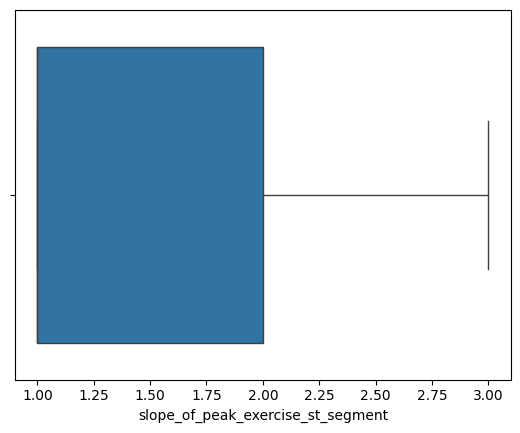

In [24]:
# slope_of_peak_exercise_st_segment	
sns.boxplot(x='slope_of_peak_exercise_st_segment',data=data3)

<Axes: xlabel='resting_blood_pressure'>

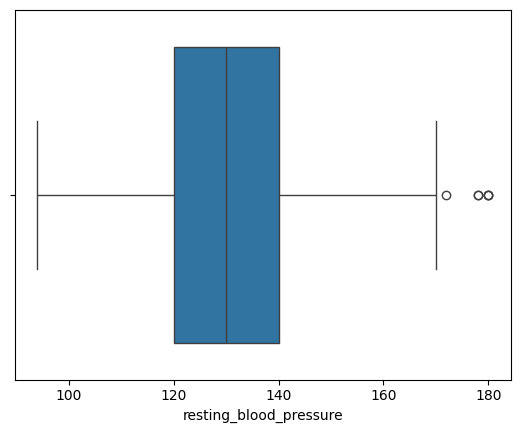

In [25]:
# resting_blood_pressure
sns.boxplot(x='resting_blood_pressure',data=data3)

In [26]:
## using IQR to remove the outliers
IQR = stats.iqr(data3['resting_blood_pressure'], interpolation = 'midpoint') 

IQR

20.0

In [27]:
# First quartile (Q1)
Q1 = data3['resting_blood_pressure'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['resting_blood_pressure'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: 90.0
Max Limit: 170.0


In [28]:
median_value = data3['resting_blood_pressure'].median()

# Replace outliers with the median value
data3['resting_blood_pressure'] = data3['resting_blood_pressure'].apply(lambda x: median_value if (x < min_limit or x > max_limit) else x)

# Check the updated data
print(data3['resting_blood_pressure'].describe())

count    180.000000
mean     129.711111
std       14.611731
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      170.000000
Name: resting_blood_pressure, dtype: float64


<Axes: xlabel='resting_blood_pressure'>

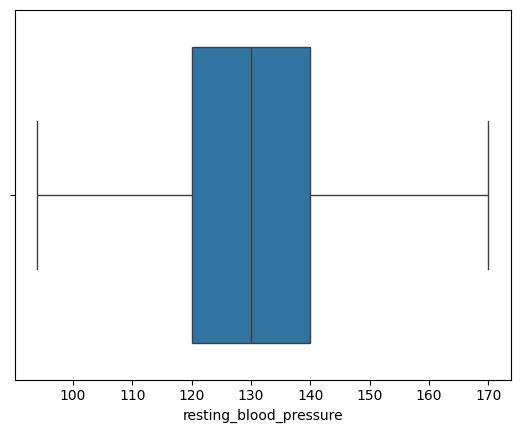

In [29]:
sns.boxplot(x='resting_blood_pressure',data=data3)

<Axes: xlabel='chest_pain_type'>

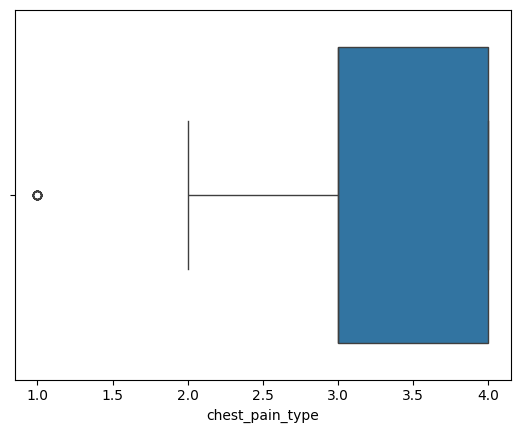

In [30]:
# chest_pain_type
sns.boxplot(x='chest_pain_type',data=data3)

In [31]:
## using IQR to remove the outliers
IQR = stats.iqr(data3['chest_pain_type'], interpolation = 'midpoint') 

IQR

1.0

In [32]:
# First quartile (Q1)
Q1 = data3['chest_pain_type'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['chest_pain_type'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: 1.5
Max Limit: 5.5


In [33]:
median_value = data3['chest_pain_type'].median()

# Replace outliers with the median value
data3['chest_pain_type'] = data3['chest_pain_type'].apply(lambda x: median_value if (x < min_limit or x > max_limit) else x)

# Check the updated data
print(data3['chest_pain_type'].describe())

count    180.000000
mean       3.300000
std        0.723894
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: chest_pain_type, dtype: float64


<Axes: xlabel='chest_pain_type'>

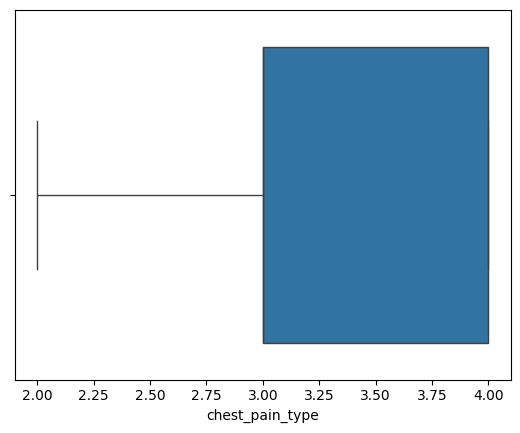

In [34]:
sns.boxplot(x='chest_pain_type',data=data3)

<Axes: xlabel='num_major_vessels'>

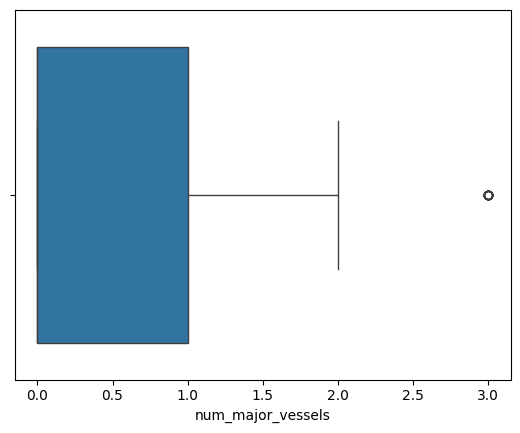

In [35]:
# num_major_vessels
sns.boxplot(x='num_major_vessels',data=data3)

In [36]:
## using IQR to remove the outliers
IQR = stats.iqr(data3['num_major_vessels'], interpolation = 'midpoint') 

IQR

1.0

In [37]:
# First quartile (Q1)
Q1 = data3['num_major_vessels'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['num_major_vessels'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: -1.5
Max Limit: 2.5


In [38]:
median_value = data3['num_major_vessels'].median()

# Replace outliers with the median value
data3['num_major_vessels'] = data3['num_major_vessels'].apply(lambda x: median_value if (x < min_limit or x > max_limit) else x)

# Check the updated data
print(data3['num_major_vessels'].describe())

count    180.000000
mean       0.461111
std        0.711940
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: num_major_vessels, dtype: float64


<Axes: xlabel='num_major_vessels'>

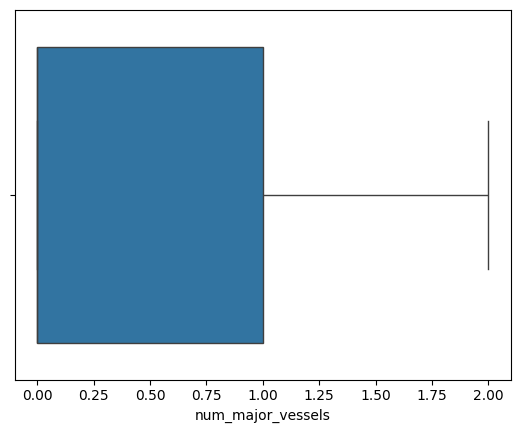

In [39]:
sns.boxplot(x='num_major_vessels',data=data3)

<Axes: xlabel='fasting_blood_sugar_gt_120_mg_per_dl'>

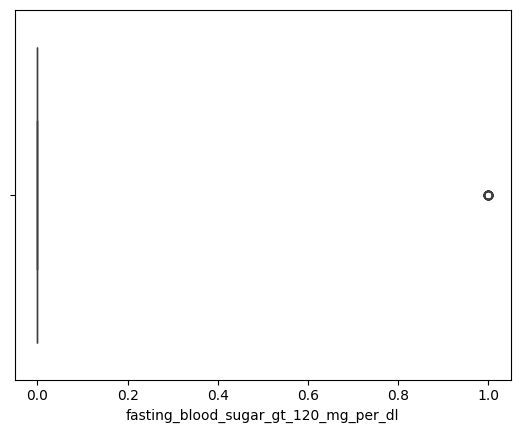

In [40]:
# fasting_blood_sugar_gt_120_mg_per_dl
sns.boxplot(x='fasting_blood_sugar_gt_120_mg_per_dl',data=data3) #we need to drop this column

In [41]:
## using IQR to remove the outliers
IQR = stats.iqr(data3['fasting_blood_sugar_gt_120_mg_per_dl'], interpolation = 'midpoint') 

IQR

0.0

In [42]:
# First quartile (Q1)
Q1 = data3['fasting_blood_sugar_gt_120_mg_per_dl'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['fasting_blood_sugar_gt_120_mg_per_dl'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: 0.0
Max Limit: 0.0


<Axes: xlabel='resting_ekg_results'>

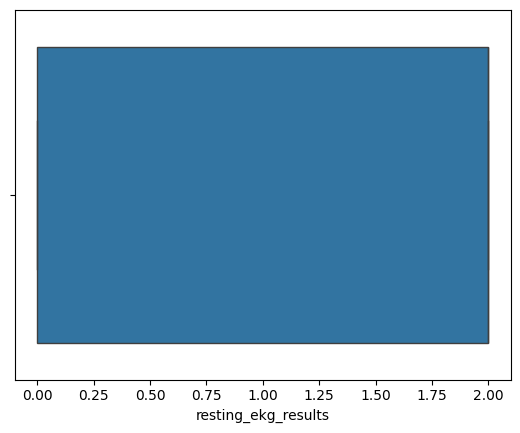

In [43]:
# resting_ekg_results
sns.boxplot(x='resting_ekg_results',data=data3)

<Axes: xlabel='serum_cholesterol_mg_per_dl'>

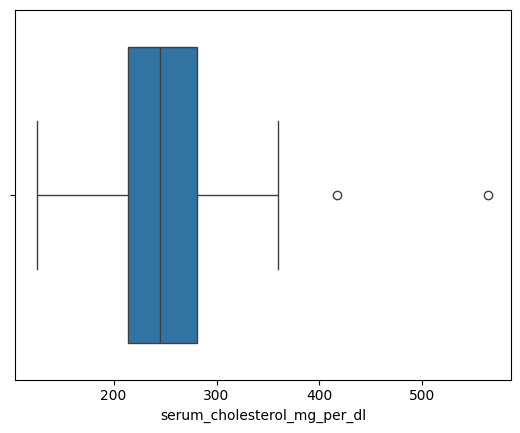

In [44]:
# serum_cholesterol_mg_per_dl
sns.boxplot(x='serum_cholesterol_mg_per_dl',data=data3)

In [45]:
## using IQR to remove the outliers
IQR = stats.iqr(data3['serum_cholesterol_mg_per_dl'], interpolation = 'midpoint') 

IQR

68.0

In [46]:
# First quartile (Q1)
Q1 = data3['serum_cholesterol_mg_per_dl'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['serum_cholesterol_mg_per_dl'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: 112.5
Max Limit: 382.5


In [47]:
median_value = data3['serum_cholesterol_mg_per_dl'].median()

# Replace outliers with the median value
data3['serum_cholesterol_mg_per_dl'] = data3['serum_cholesterol_mg_per_dl'].apply(lambda x: median_value if (x < min_limit or x > max_limit) else x)

# Check the updated data
print(data3['serum_cholesterol_mg_per_dl'].describe())

count    180.000000
mean     246.488889
std       45.398452
min      126.000000
25%      213.750000
50%      245.250000
75%      277.000000
max      360.000000
Name: serum_cholesterol_mg_per_dl, dtype: float64


<Axes: xlabel='serum_cholesterol_mg_per_dl'>

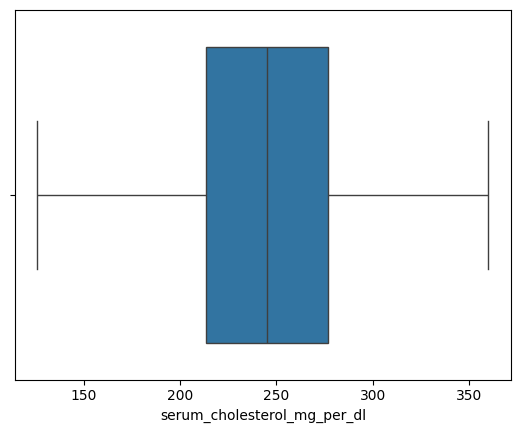

In [48]:
sns.boxplot(x='serum_cholesterol_mg_per_dl',data=data3)

<Axes: xlabel='oldpeak_eq_st_depression'>

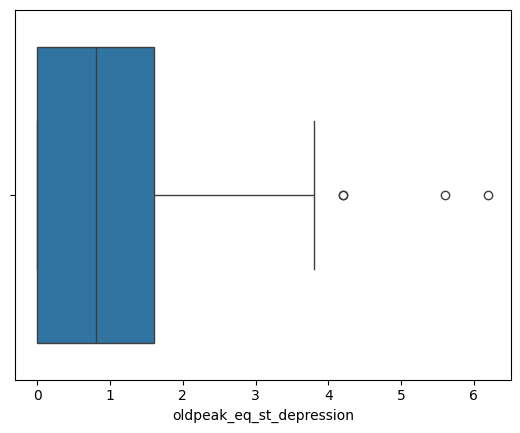

In [49]:
# oldpeak_eq_st_depression
sns.boxplot(x='oldpeak_eq_st_depression',data=data3)

In [50]:
## using IQR to remove the outliers
IQR = stats.iqr(data3['oldpeak_eq_st_depression'], interpolation = 'midpoint') 

IQR

1.6

In [51]:
# First quartile (Q1)
Q1 = data3['oldpeak_eq_st_depression'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['oldpeak_eq_st_depression'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: -2.4000000000000004
Max Limit: 4.0


In [52]:
median_value = data3['oldpeak_eq_st_depression'].median()

# Replace outliers with the median value
data3['oldpeak_eq_st_depression'] = data3['oldpeak_eq_st_depression'].apply(lambda x: median_value if (x < min_limit or x > max_limit) else x)

# Check the updated data
print(data3['oldpeak_eq_st_depression'].describe())

count    180.000000
mean       0.915556
std        0.931439
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        3.800000
Name: oldpeak_eq_st_depression, dtype: float64


<Axes: xlabel='oldpeak_eq_st_depression'>

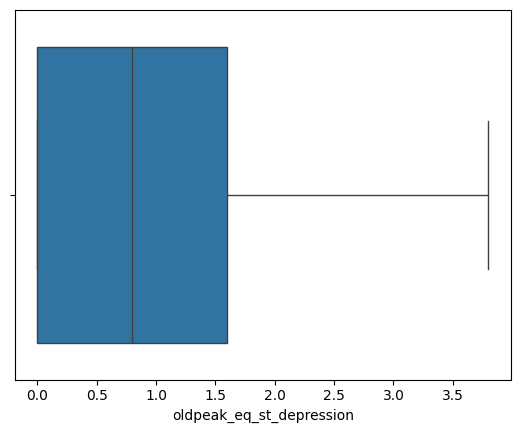

In [53]:
sns.boxplot(x='oldpeak_eq_st_depression',data=data3)

<Axes: xlabel='sex'>

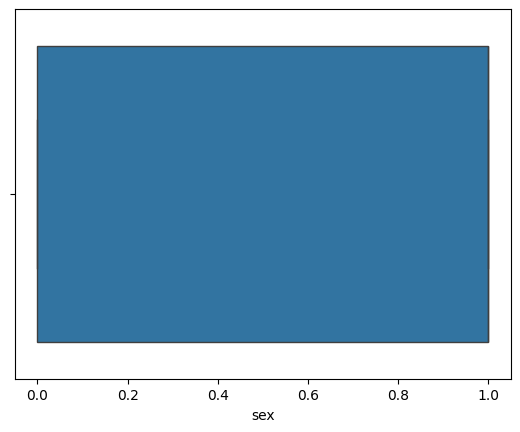

In [54]:
# sex
sns.boxplot(x='sex',data=data3)

<Axes: xlabel='age'>

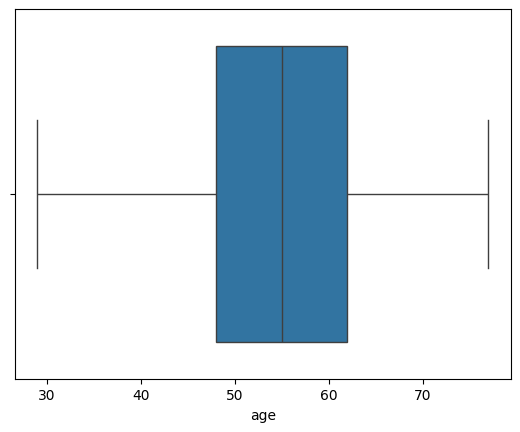

In [55]:
# age
sns.boxplot(x='age',data=data3)

<Axes: xlabel='max_heart_rate_achieved'>

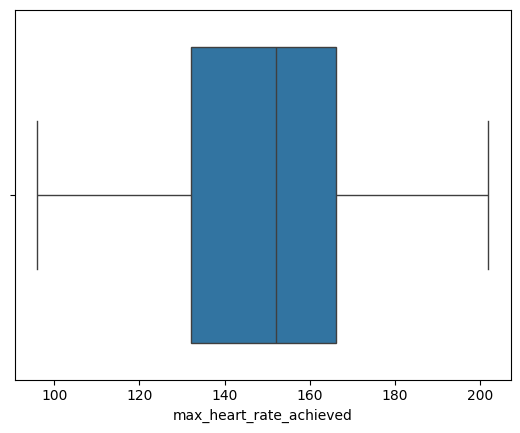

In [56]:
# max_heart_rate_achieved
sns.boxplot(x='max_heart_rate_achieved',data=data3)

# Scaling

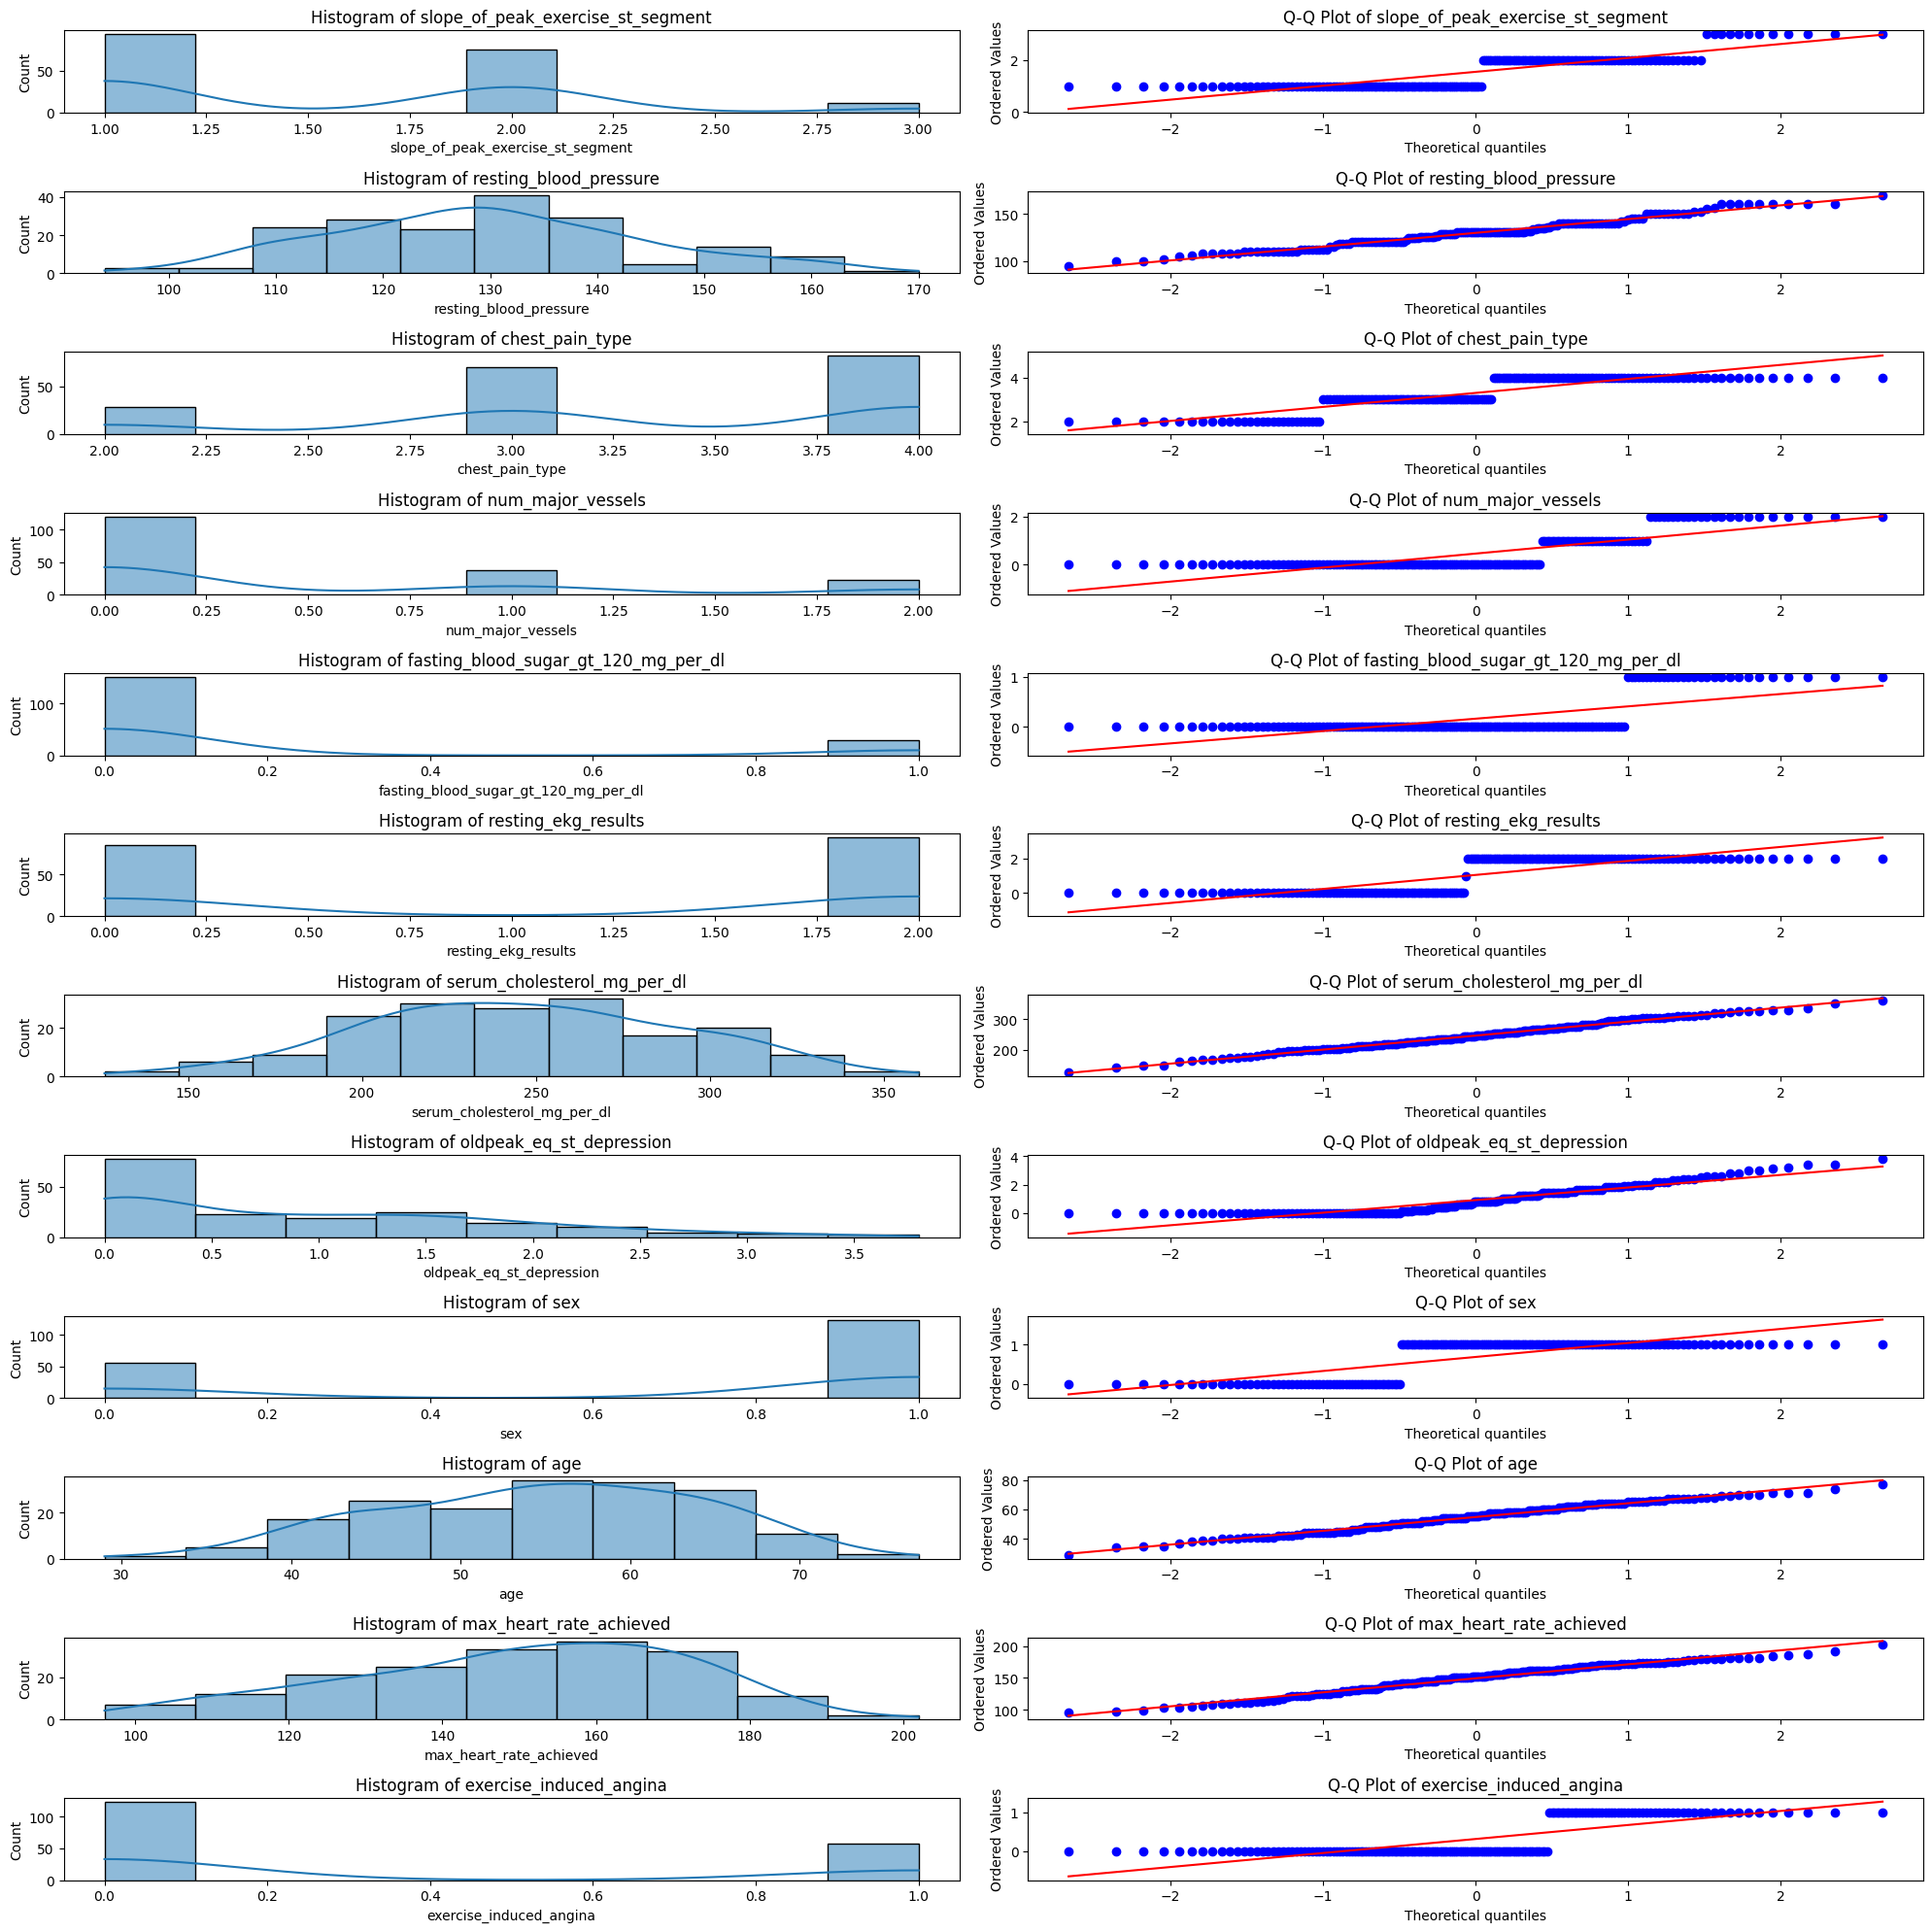

In [57]:
from scipy.stats import probplot
# Select numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 20))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, i*2-1)
    sns.histplot(data3[column], kde=True)
    plt.title(f"Histogram of {column}")
    
    plt.subplot(len(numerical_columns), 2, i*2)
    probplot(data3[column], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {column}")

plt.tight_layout()
plt.show()


* StandardScaler: Works for columns where the data is normal or can be approximated as normal.
* RobustScaler: Effective for columns with potential outliers, ensuring they don’t skew the data during scaling.
* No Scaling for Binary Data: Binary columns like sex and fasting_blood_sugar_gt_120_mg_per_dl don't need scaling since the range (0, 1) is already normalized.

In [58]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# Initialize scalers
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

# Columns for scaling
standard_scaling_columns = ['slope_of_peak_exercise_st_segment', 
                            'chest_pain_type', 
                            'num_major_vessels', 
                            'resting_ekg_results', 
                            'age', 
                            'max_heart_rate_achieved']
robust_scaling_columns = ['resting_blood_pressure', 
                          'serum_cholesterol_mg_per_dl', 
                          'oldpeak_eq_st_depression']

# Apply scaling
data[standard_scaling_columns] = standard_scaler.fit_transform(data[standard_scaling_columns])
data[robust_scaling_columns] = robust_scaler.fit_transform(data[robust_scaling_columns])

In [59]:
data3.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,0,128.0,2.0,0.0,0,2,308.0,0.0,1,45,170,0
1,ryoo3j,2,0,110.0,3.0,0.0,0,0,214.0,1.6,0,54,158,0
2,yt1s1x,1,0,125.0,4.0,0.0,0,2,304.0,0.0,1,77,162,1
3,l2xjde,1,1,152.0,4.0,0.0,0,0,223.0,0.0,1,40,181,0
4,oyt4ek,3,1,130.0,3.0,0.0,0,2,270.0,0.8,1,59,145,0


# Feature Engineering

In [60]:
data3.drop(columns=['patient_id','fasting_blood_sugar_gt_120_mg_per_dl'],inplace=True)

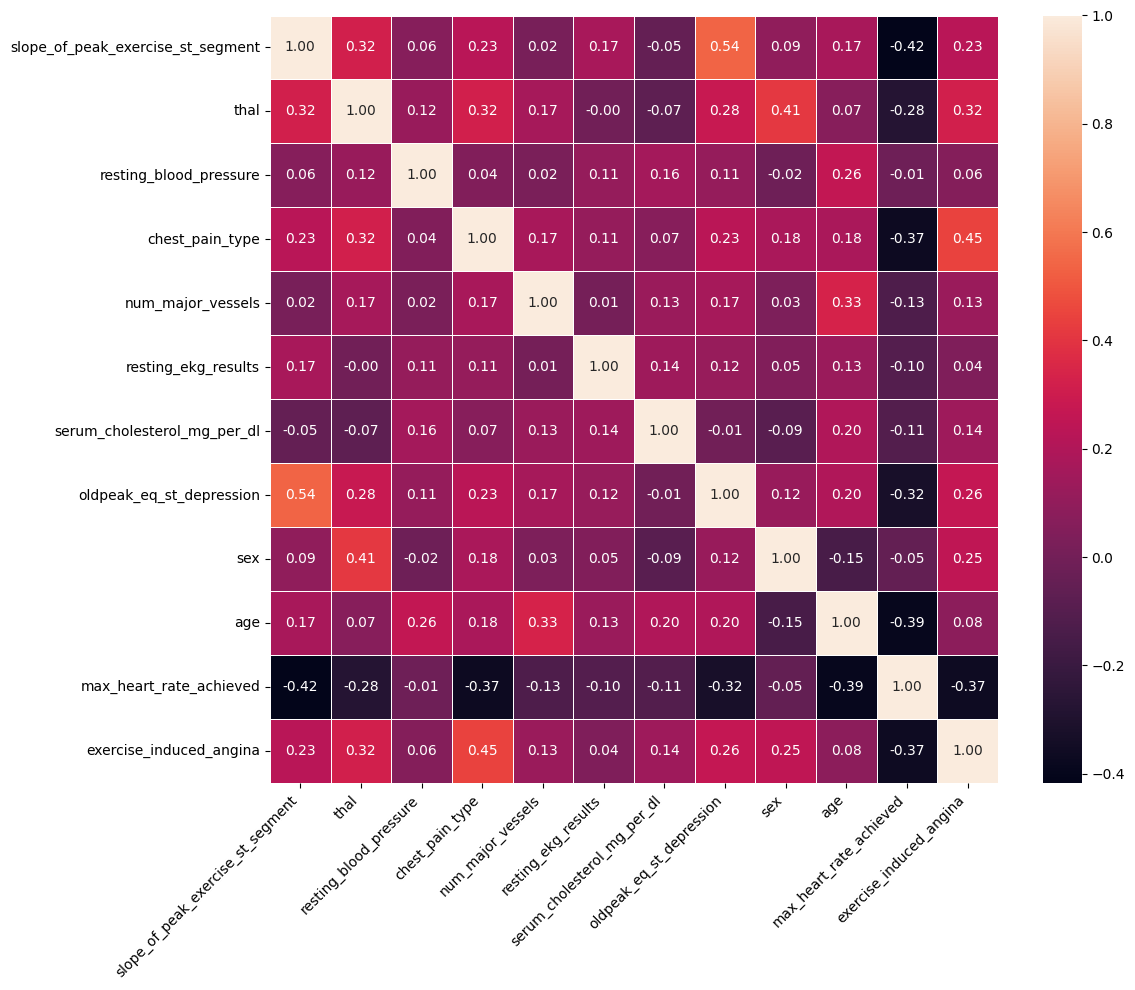

In [61]:
plt.figure(figsize=(12, 10))  # Adjust the figure size to make the heatmap larger
sns.heatmap(data3.corr(), annot=True, fmt='.2f', linewidths=0.5, cbar=True)

# Rotate the x and y axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()

# Model Creation

In [62]:
## Creating independent and dependent variable
x = data3.drop('exercise_induced_angina', axis=1)
y = data3['exercise_induced_angina']

In [63]:
x

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved
0,1,0,128.0,2.0,0.0,2,308.0,0.0,1,45,170
1,2,0,110.0,3.0,0.0,0,214.0,1.6,0,54,158
2,1,0,125.0,4.0,0.0,2,304.0,0.0,1,77,162
3,1,1,152.0,4.0,0.0,0,223.0,0.0,1,40,181
4,3,1,130.0,3.0,0.0,2,270.0,0.8,1,59,145
...,...,...,...,...,...,...,...,...,...,...,...
175,2,1,125.0,4.0,2.0,0,254.0,0.2,1,67,163
176,2,0,130.0,4.0,0.0,1,327.0,3.4,0,55,117
177,2,1,125.0,3.0,0.0,0,309.0,1.8,1,64,131
178,1,0,124.0,3.0,2.0,0,255.0,0.0,1,48,175


In [64]:
y

0      0
1      0
2      1
3      0
4      0
      ..
175    0
176    1
177    1
178    0
179    0
Name: exercise_induced_angina, Length: 180, dtype: int64

In [65]:
## Creating testing and training data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
data3.exercise_induced_angina.value_counts()

exercise_induced_angina
0    123
1     57
Name: count, dtype: int64

# SMOTE

In [67]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# Check the class distribution before SMOTE
print("Before SMOTE:")
print(y_train.value_counts())

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE:
exercise_induced_angina
0    97
1    47
Name: count, dtype: int64
After SMOTE: Counter({0: 97, 1: 97})


# Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
from sklearn.metrics import confusion_matrix , accuracy_score , recall_score,precision_score,f1_score,classification_report

In [70]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_smote, y_train_smote)  # Use SMOTE data

# Make predictions on the test set
y_pred = model.predict(X_test)  # Predictions on the original test data

# Evaluate the model performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print Precision, Recall, and F1 Score
print("Recall Score:", recall_score(y_test, y_pred))  
print("Precision Score:", precision_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy Score: 0.7222222222222222

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.69      0.78        26
           1       0.50      0.80      0.62        10

    accuracy                           0.72        36
   macro avg       0.70      0.75      0.70        36
weighted avg       0.79      0.72      0.74        36

Recall Score: 0.8
Precision Score: 0.5
F1 Score: 0.6153846153846154

Confusion Matrix:
[[18  8]
 [ 2  8]]


### Key Observations:
* Accuracy: The accuracy score is 0.72, meaning that 72% of the predictions were correct. This is a decent result but not great, especially considering the imbalance in the dataset.

#### Classification Report:
##### Class 0 (No Heart Disease):
* Precision: 0.90, Recall: 0.69, F1-score: 0.78
High precision means the model is good at predicting the majority class (No Heart Disease) correctly when it predicts it.
However, the recall (0.69) indicates that the model misses some of the actual class 0 instances.
##### Class 1 (Heart Disease):
* Precision: 0.50, Recall: 0.80, F1-score: 0.62
The recall for class 1 is high (0.80), meaning the model is good at detecting patients who have heart disease.
However, precision is lower (0.50), meaning the model often incorrectly predicts heart disease when the class is 1.

#### Precision, Recall, F1-Score:
* Recall Score: 0.8, indicating that 80% of the positive class (Heart Disease) instances are correctly identified.
Precision Score: 0.5, meaning that half of the instances predicted as positive are actually correct.
* F1 Score: 0.62, which is a balance between precision and recall for the positive class.

#### Confusion Matrix:
* True Negatives (18): 18 instances of class 0 (No Heart Disease) are correctly classified.
* False Positives (8): 8 instances of class 0 are incorrectly classified as class 1 (Heart Disease).
* False Negatives (2): 2 instances of class 1 are incorrectly classified as class 0.
* True Positives (8): 8 instances of class 1 are correctly classified.

#### Insights:
* Class Imbalance: The model seems to perform well for the majority class (No Heart Disease) with high precision but struggles with detecting heart disease cases (class 1) due to lower precision (0.50).
* The recall for class 1 is good (0.80), meaning it’s capturing most of the heart disease cases, but it still has a low precision (0.50) which leads to a higher number of false positives.

# KNN Classifier

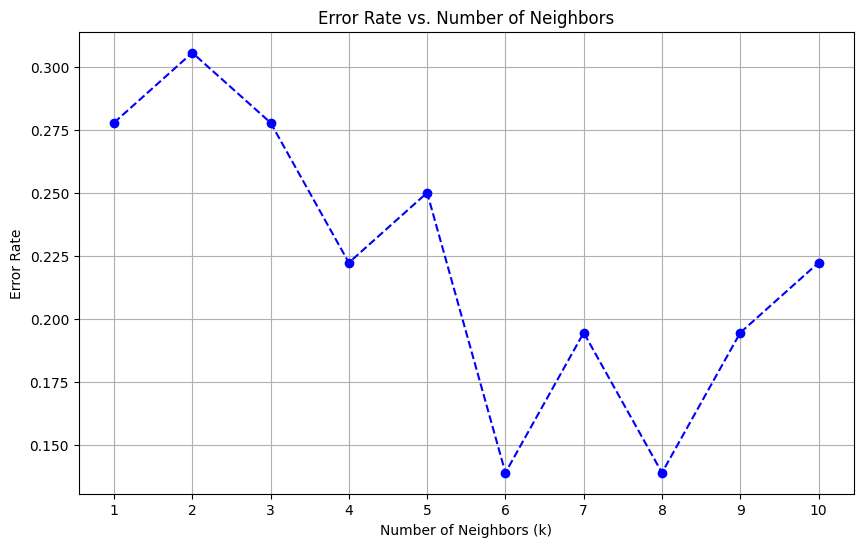

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the class distribution in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data, transform the test data
X_train_scaled = scaler.fit_transform(X_train_smote)  # Apply scaling after SMOTE
X_test_scaled = scaler.transform(X_test)  # Apply scaling to the test set

# List to store error rates
error_rate = []

# Loop through different values of n_neighbors
for i in range(1, 11):  # Testing k values from 1 to 10
    knn = KNeighborsClassifier(n_neighbors=i)  # Initialize KNN with k=i
    knn.fit(X_train_scaled, y_train_smote)  # Train the model with SMOTE data
    y_predict = knn.predict(X_test_scaled)  # Predict on the test data
    error_rate.append(np.mean(y_predict != y_test))  # Append error rate

# Plot the error rates to visualize
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), error_rate, marker='o', linestyle='--', color='b')
plt.title('Error Rate vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [78]:
from sklearn.metrics import confusion_matrix , accuracy_score , recall_score,precision_score,f1_score,classification_report
# Initialize the KNN model with the best k value
knn = KNeighborsClassifier(n_neighbors=4)

# Fit the model on the training data (with SMOTE applied and scaled)
knn.fit(X_train_smote, y_train_smote)

# Make predictions on the test data (scaled)
y_pred_knn = knn.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_knn)

# Print the accuracy, classification report, and confusion matrix
print(f"Accuracy Score: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

Accuracy Score: 0.7222222222222222

Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        26
           1       0.00      0.00      0.00        10

    accuracy                           0.72        36
   macro avg       0.36      0.50      0.42        36
weighted avg       0.52      0.72      0.61        36


Confusion Matrix:
[[26  0]
 [10  0]]


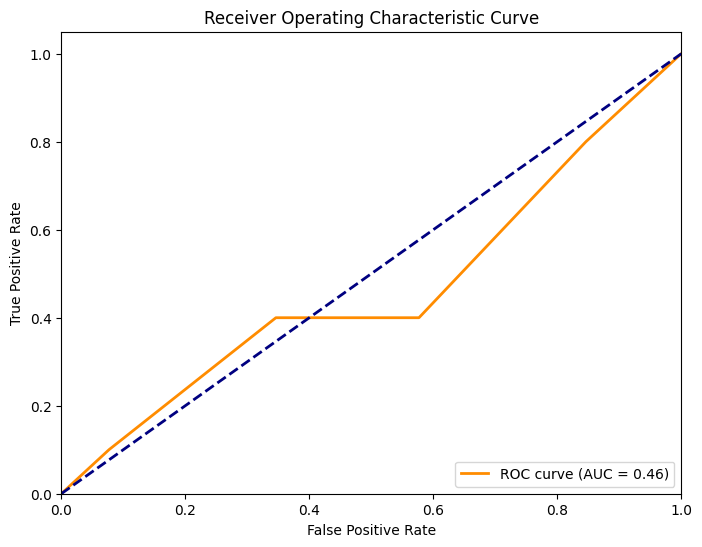

In [80]:
from sklearn.metrics import roc_curve, auc

y_prob = knn.predict_proba(X_test)[:, 1]  # Get the probability for class 1

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (no skill)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()

## Hyperparameter tuning (Grid SearchCV)

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the model
knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': [2, 3, 5],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean'],
    'algorithm': ['auto']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best model for predictions
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

Best Parameters: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'distance'}
Best Score: 0.3320375106564365


In [82]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Predictions
y_pred_knn = best_knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy Score:", accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_knn)
print("ROC AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)

Accuracy Score: 0.6388888888888888
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.73      0.75        26
           1       0.36      0.40      0.38        10

    accuracy                           0.64        36
   macro avg       0.56      0.57      0.56        36
weighted avg       0.65      0.64      0.64        36

Confusion Matrix:
[[19  7]
 [ 6  4]]
ROC AUC Score: 0.5653846153846155


### Accuracy Score (63.89%):
* Indicates the overall percentage of correct predictions. It’s moderate but may not be sufficient for sensitive problems like heart disease prediction.

### Classification Report:
### Precision:
* For class 0 (majority class), it’s 0.76, indicating the model does well predicting class 0.
* For class 1 (minority class), it’s low at 0.36, showing difficulty in correctly identifying positive cases.

### Recall:
* For class 0, it's 0.73, meaning most true negatives are correctly predicted.
* For class 1, it's 0.40, showing the model struggles to identify true positives.

### F1 Score: 
* The harmonic mean of precision and recall reflects the imbalance in predicting class 1.

### Confusion Matrix:
* Class 0 (True Negatives): 19 correctly predicted, 7 misclassified.
* Class 1 (True Positives): 4 correctly predicted, 6 misclassified.
* The model leans toward predicting the majority class (0).

### ROC AUC Score (0.565):
* Close to 0.5 suggests the model has only slightly better discrimination ability than random guessing.

# SVM Classifier

In [83]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [85]:

# Scale the features
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Create the SVM model
svm = SVC(probability=True)  # Enable probability for ROC AUC

# Train the model
svm.fit(X_train_res_scaled, y_train_smote)

# Predict on the test set
y_pred_svm = svm.predict(X_test_scaled)
y_prob_svm = svm.predict_proba(X_test_scaled)[:, 1]  # Probability for ROC AUC

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy Score: {accuracy}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob_svm)
print(f"ROC AUC Score: {roc_auc}")


Accuracy Score: 0.8055555555555556
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.81      0.86        26
           1       0.62      0.80      0.70        10

    accuracy                           0.81        36
   macro avg       0.76      0.80      0.78        36
weighted avg       0.83      0.81      0.81        36

Confusion Matrix:
 [[21  5]
 [ 2  8]]
ROC AUC Score: 0.8115384615384617


## Hyperparameter tuning (Grid SearchCV)

In [87]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Scale the features (important for SVM)
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Define the model
svm = SVC()

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Types of kernels
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'class_weight': [None, 'balanced'],  # Handle class imbalance
}

# Create GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_res_scaled, y_train_smote)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model
best_svm = grid_search.best_estimator_

# Make predictions on the test set
y_pred_svm = best_svm.predict(X_test_scaled)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy Score: {accuracy}')

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_svm)
print(f'ROC AUC Score: {roc_auc}')


Best Parameters: {'C': 100, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.8346517830845434
Accuracy Score: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        26
           1       0.70      0.70      0.70        10

    accuracy                           0.83        36
   macro avg       0.79      0.79      0.79        36
weighted avg       0.83      0.83      0.83        36

Confusion Matrix:
[[23  3]
 [ 3  7]]
ROC AUC Score: 0.7923076923076923


## Cross validation score

In [93]:
from sklearn.model_selection import cross_val_score
svm = SVC(C=100, kernel='rbf', gamma='scale')  

# Perform cross-validation (use fewer folds for quicker output)
cv_scores = cross_val_score(svm, X_train_smote, y_train_smote, cv=5, scoring='f1') 

# Print the mean and std dev of cross-validation F1 scores
print(f'Mean cross-validation F1 score: {cv_scores.mean()}')
print(f'Standard deviation of cross-validation F1 score: {cv_scores.std()}')

svm.fit(X_train_smote, y_train_smote)

# Predict on the test data after cross-validation
y_pred_svm = svm.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy Score: {accuracy}')

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_svm)
print(f'ROC AUC Score: {roc_auc}')

Mean cross-validation F1 score: 0.6781207827260458
Standard deviation of cross-validation F1 score: 0.06118922174947868
Accuracy Score: 0.6388888888888888
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.62      0.71        26
           1       0.41      0.70      0.52        10

    accuracy                           0.64        36
   macro avg       0.63      0.66      0.61        36
weighted avg       0.72      0.64      0.66        36

Confusion Matrix:
[[16 10]
 [ 3  7]]
ROC AUC Score: 0.6576923076923077


# Decision Tree Classifier

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score, precision_score, recall_score

# Create and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dt)
roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

print(f"Accuracy: {accuracy}")
print(f"ROC AUC Score: {roc_auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Accuracy: 0.6944444444444444
ROC AUC Score: 0.6653846153846155
Precision: 0.46153846153846156
Recall: 0.6
F1 Score: 0.5217391304347826
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.73      0.78        26
           1       0.46      0.60      0.52        10

    accuracy                           0.69        36
   macro avg       0.64      0.67      0.65        36
weighted avg       0.72      0.69      0.71        36



## Hyperparameter tuning (Grid SearchCV)

In [95]:
from sklearn.model_selection import GridSearchCV

# Define the model
dt_model = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2]
}

# Perform grid search
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

# Output the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_dt_model = grid_search.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
roc_auc = roc_auc_score(y_test, best_dt_model.predict_proba(X_test)[:, 1])
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

print(f"Accuracy: {accuracy}")
print(f"ROC AUC Score: {roc_auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best F1 Score: 0.7680774059628036
Accuracy: 0.6666666666666666
ROC AUC Score: 0.675
Precision: 0.4166666666666667
Recall: 0.5
F1 Score: 0.45454545454545453
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        26
           1       0.42      0.50      0.45        10

    accuracy                           0.67        36
   macro avg       0.60      0.62      0.61        36
weighted avg       0.69      0.67      0.68        36



## Cross validation score

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Define the model
dt_model = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=10, min_samples_split=5, min_samples_leaf= 1)

# Define scoring metrics
scorers = {
    'accuracy': 'accuracy',
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

# Perform cross-validation for each metric
for metric_name, scorer in scorers.items():
    scores = cross_val_score(dt_model, X_train_smote, y_train_smote, cv=5, scoring=scorer)
    print(f"{metric_name.capitalize()} CV Scores: {scores}")
    print(f"Mean {metric_name.capitalize()}: {scores.mean()}")

Accuracy CV Scores: [0.71794872 0.76923077 0.71794872 0.82051282 0.84210526]
Mean Accuracy: 0.773549257759784
F1 CV Scores: [0.64516129 0.74285714 0.76595745 0.82926829 0.85714286]
Mean F1: 0.7680774059628036
Precision CV Scores: [0.83333333 0.8125     0.66666667 0.80952381 0.7826087 ]
Mean Precision: 0.7809265010351967
Recall CV Scores: [0.52631579 0.68421053 0.9        0.85       0.94736842]
Mean Recall: 0.781578947368421


# Random Forest Classifier

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, classification_report

# Model creation
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print(f"Accuracy: {accuracy}")
print(f"ROC AUC Score: {roc_auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.6944444444444444
ROC AUC Score: 0.7711538461538462
Precision: 0.46153846153846156
Recall: 0.6
F1 Score: 0.5217391304347826
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.73      0.78        26
           1       0.46      0.60      0.52        10

    accuracy                           0.69        36
   macro avg       0.64      0.67      0.65        36
weighted avg       0.72      0.69      0.71        36



## Hyperparameter tuning (Grid SearchCV)

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Evaluate the best model
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print(f"Accuracy: {accuracy}")
print(f"ROC AUC Score: {roc_auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best F1 Score: 0.8126173590003377
Accuracy: 0.7777777777777778
ROC AUC Score: 0.7730769230769231
Precision: 0.5714285714285714
Recall: 0.8
F1 Score: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        26
           1       0.57      0.80      0.67        10

    accuracy                           0.78        36
   macro avg       0.74      0.78      0.75        36
weighted avg       0.82      0.78      0.79        36



## Cross validation 

In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score

# Define the model
rf_model = RandomForestClassifier(random_state=42, criterion='gini', n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=1)

# Scoring metrics
scoring = ['accuracy', 'f1', 'precision', 'recall']

# Perform cross-validation for different metrics
accuracy_scores = cross_val_score(rf_model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
f1_scores = cross_val_score(rf_model, X_train_smote, y_train_smote, cv=5, scoring='f1')
precision_scores = cross_val_score(rf_model, X_train_smote, y_train_smote, cv=5, scoring='precision')
recall_scores = cross_val_score(rf_model, X_train_smote, y_train_smote, cv=5, scoring='recall')

# Results
print("Accuracy CV Scores:", accuracy_scores)
print("Mean Accuracy:", accuracy_scores.mean())
print("F1 CV Scores:", f1_scores)
print("Mean F1:", f1_scores.mean())
print("Precision CV Scores:", precision_scores)
print("Mean Precision:", precision_scores.mean())
print("Recall CV Scores:", recall_scores)
print("Mean Recall:", recall_scores.mean())


Accuracy CV Scores: [0.82051282 0.79487179 0.66666667 0.84615385 0.89473684]
Mean Accuracy: 0.8045883940620783
F1 CV Scores: [0.8        0.77777778 0.72340426 0.85714286 0.9047619 ]
Mean F1: 0.8126173590003377
Precision CV Scores: [0.875      0.82352941 0.62962963 0.81818182 0.82608696]
Mean Precision: 0.7944855632195786
Recall CV Scores: [0.73684211 0.73684211 0.85       0.9        1.        ]
Mean Recall: 0.844736842105263


# Bagging with K-Nearest Neighbors (KNN)
### Hyperparameter Tuning with RandomSearchCV

In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the base model (KNN)
knn_model = KNeighborsClassifier()

# Create the Bagging model
bagging_model = BaggingClassifier(base_estimator=knn_model, random_state=42)

# Define hyperparameter grid for Bagging
param_grid = {
    'n_estimators': [100],
    'max_samples': [0.8],
    'max_features': [0.8]
}

# Hyperparameter tuning with RandomizedSearchCV
random_search = RandomizedSearchCV(bagging_model, param_distributions=param_grid, n_iter=5, cv=3, scoring='f1', random_state=42, n_jobs=-1)
random_search.fit(X_train_smote, y_train_smote)

# Output best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Evaluate the model
best_model = random_search.best_estimator_
y_pred_bk = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_bk))
print("Classification Report:")
print(classification_report(y_test, y_pred_bk))

Best Parameters: {'n_estimators': 100, 'max_samples': 0.8, 'max_features': 0.8}
Best Score: 0.7102369213403249
Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        26
           1       0.42      0.50      0.45        10

    accuracy                           0.67        36
   macro avg       0.60      0.62      0.61        36
weighted avg       0.69      0.67      0.68        36



In [101]:
from sklearn.model_selection import cross_val_score

# Performing cross-validation
cv_scores = cross_val_score(knn_model, X_train_smote, y_train_smote, cv=5, scoring='f1')

# Output cross-validation scores
print("Cross-validation Accuracy:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-validation Accuracy: [0.66666667 0.66666667 0.7        0.77272727 0.66666667]
Mean Accuracy: 0.6945454545454545


# Bagging with Decision Tree Classifier

In [102]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Define the base model (Decision Tree)
dt_model = DecisionTreeClassifier(random_state=42)

# Create the Bagging model
bagging_model = BaggingClassifier(base_estimator=dt_model, random_state=42)

# Define hyperparameter grid for Bagging
param_grid = {
    'n_estimators': [50, 100],
    'max_samples': [0.5, 0.8],
    'max_features': [0.5, 0.8]
}

# Hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(bagging_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_smote, y_train_smote)

# Output best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the model
best_model = grid_search.best_estimator_
y_pred_bd = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_bd))
print("Classification Report:")
print(classification_report(y_test, y_pred_bd))

# Perform cross-validation
cv_scores = cross_val_score(best_model, X_train_smote, y_train_smote, cv=5, scoring='f1')
print("Cross-validation Accuracy:", cv_scores)

Best Parameters: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 50}
Best Score: 0.7834285449940004
Accuracy: 0.7222222222222222
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        26
           1       0.50      0.60      0.55        10

    accuracy                           0.72        36
   macro avg       0.67      0.68      0.67        36
weighted avg       0.74      0.72      0.73        36

Cross-validation Accuracy: [0.77777778 0.70588235 0.73913043 0.8372093  0.85714286]


# Bagging with Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Define the base model (Logistic Regression)
logreg_model = LogisticRegression(random_state=42)

# Create the Bagging model
bagging_model = BaggingClassifier(base_estimator=logreg_model, random_state=42)

# Define hyperparameter grid for Bagging
param_grid = {
    'n_estimators': [50, 100],
    'max_samples': [0.5, 0.8],
    'max_features': [0.5, 0.8]
}

# Hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(bagging_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_smote, y_train_smote)

# Output best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the model
best_model = grid_search.best_estimator_
y_pred_bl = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_bl))
print("Classification Report:")
print(classification_report(y_test, y_pred_bl))

# Perform cross-validation
cv_scores = cross_val_score(best_model, X_train_smote, y_train_smote, cv=5, scoring='f1')
print("Cross-validation Accuracy:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Best Parameters: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 100}
Best Score: 0.7134202623676308
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81        26
           1       0.53      0.80      0.64        10

    accuracy                           0.75        36
   macro avg       0.72      0.77      0.72        36
weighted avg       0.80      0.75      0.76        36

Cross-validation Accuracy: [0.78947368 0.75       0.62222222 0.7027027  0.7027027 ]
Mean Accuracy: 0.7134202623676308


# Boosting with Decision Tree Classifier (AdaBoost)

In [104]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Define the base model (Decision Tree)
dt_model = DecisionTreeClassifier(max_depth=1, random_state=42)

# Create the AdaBoost model
adaboost_model = AdaBoostClassifier(base_estimator=dt_model, random_state=42)

# Define hyperparameter grid for Boosting
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.5]
}

# Hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(adaboost_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_smote, y_train_smote)

# Output best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the model
best_model = grid_search.best_estimator_
y_pred_st = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_st))
print("Classification Report:")
print(classification_report(y_test, y_pred_st))

# Perform cross-validation
cv_scores = cross_val_score(best_model, X_train_smote, y_train_smote, cv=5, scoring='f1')
print("Cross-validation Accuracy:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}
Best Score: 0.7617318117990011
Accuracy: 0.7222222222222222
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        26
           1       0.50      0.70      0.58        10

    accuracy                           0.72        36
   macro avg       0.68      0.72      0.69        36
weighted avg       0.76      0.72      0.73        36

Cross-validation Accuracy: [0.74285714 0.73684211 0.72340426 0.75555556 0.85      ]
Mean Accuracy: 0.7617318117990011


# Boosting with Logistic Regression (AdaBoost)

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Define the base model (Logistic Regression)
logreg_model = LogisticRegression(random_state=42)

# Create the AdaBoost model
adaboost_model = AdaBoostClassifier(base_estimator=logreg_model, random_state=42)

# Define hyperparameter grid for Boosting
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.5]
}

# Hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(adaboost_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_smote, y_train_smote)

# Output best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the model
best_model = grid_search.best_estimator_
y_pred_bbl = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_bbl))
print("Classification Report:")
print(classification_report(y_test, y_pred_bbl))

# Perform cross-validation
cv_scores = cross_val_score(best_model, X_train_smote, y_train_smote, cv=5, scoring='f1')
print("Cross-validation Accuracy:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Best Parameters: {'learning_rate': 0.5, 'n_estimators': 50}
Best Score: 0.6873665073665073
Accuracy: 0.7222222222222222
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.69      0.78        26
           1       0.50      0.80      0.62        10

    accuracy                           0.72        36
   macro avg       0.70      0.75      0.70        36
weighted avg       0.79      0.72      0.74        36

Cross-validation Accuracy: [0.68571429 0.71794872 0.68181818 0.7027027  0.64864865]
Mean Accuracy: 0.6873665073665073


# Boosting with Random Forest (Gradient Boosting)

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Create the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Define hyperparameter grid for Boosting
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.5],
    'max_depth': [3, 5]
}

# Hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_smote, y_train_smote)

# Output best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the model
best_model = grid_search.best_estimator_
y_pred_bbr = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_bbr))
print("Classification Report:")
print(classification_report(y_test, y_pred_bbr))

# Perform cross-validation
cv_scores = cross_val_score(best_model, X_train_smote, y_train_smote, cv=5, scoring='f1')
print("Cross-validation Accuracy:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Best Parameters: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 100}
Best Score: 0.7954725079082485
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        26
           1       0.55      0.60      0.57        10

    accuracy                           0.75        36
   macro avg       0.69      0.70      0.70        36
weighted avg       0.76      0.75      0.75        36

Cross-validation Accuracy: [0.74285714 0.78947368 0.74418605 0.8372093  0.86363636]
Mean Accuracy: 0.7954725079082485


# Boosting with XGBoost

In [107]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Create the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Define hyperparameter grid for Boosting
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

# Hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_smote, y_train_smote)

# Output best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the model
best_model = grid_search.best_estimator_
y_pred_xb = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_xb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xb))

# Perform cross-validation
cv_scores = cross_val_score(best_model, X_train_smote, y_train_smote, cv=5, scoring='f1')
print("Cross-validation Accuracy:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Score: 0.7778689532841901
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        26
           1       0.54      0.70      0.61        10

    accuracy                           0.75        36
   macro avg       0.70      0.73      0.71        36
weighted avg       0.78      0.75      0.76        36

Cross-validation Accuracy: [0.64516129 0.8        0.72340426 0.85714286 0.86363636]
Mean Accuracy: 0.7778689532841901


# Naive Bayes

In [108]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# Initialize Naive Bayes model
nb_model = GaussianNB()


nb_model.fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb, average='weighted')
recall = recall_score(y_test, y_pred_nb, average='weighted')
f1 = f1_score(y_test, y_pred_nb, average='weighted')

# Print metrics
print("Naive Bayes Without Bagging:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Without Bagging:
Accuracy: 0.7777777777777778
Precision: 0.8423611111111111
Recall: 0.7777777777777778
F1 Score: 0.7889260497956151
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.73      0.83        26
           1       0.56      0.90      0.69        10

    accuracy                           0.78        36
   macro avg       0.76      0.82      0.76        36
weighted avg       0.84      0.78      0.79        36



# Bagging with Naive Bayes

In [109]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# Initialize base Naive Bayes model
nb_model = GaussianNB()

# Wrap Naive Bayes in Bagging
bagging_model = BaggingClassifier(base_estimator=nb_model, random_state=42)

# Define hyperparameter grid for Bagging
param_grid = {
    'n_estimators': [10, 50],   
    'max_samples': [0.5, 0.8], 
    'max_features': [0.5, 0.8] 
}

# Hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(bagging_model, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Predict on test set
y_pred_bnb = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_bnb)
precision = precision_score(y_test, y_pred_bnb, average='weighted')
recall = recall_score(y_test, y_pred_bnb, average='weighted')
f1 = f1_score(y_test, y_pred_bnb, average='weighted')

# Print metrics
print("\nNaive Bayes with Bagging:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Classification Report:")
print(classification_report(y_test, y_pred_bnb))

Best Parameters: {'max_features': 0.8, 'max_samples': 0.5, 'n_estimators': 10}

Naive Bayes with Bagging:
Accuracy: 0.75
Precision: 0.8015873015873016
Recall: 0.75
F1 Score: 0.7617021276595745
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81        26
           1       0.53      0.80      0.64        10

    accuracy                           0.75        36
   macro avg       0.72      0.77      0.72        36
weighted avg       0.80      0.75      0.76        36



# MODEL CAMPARISON REPORT

### 1.Logistic Regression:
* Accuracy: 0.7222
* Precision (Class 1): 0.50
* Recall (Class 1): 0.80
* F1 Score (Class 1): 0.6154
#### Key Observation: Performs well with linear relationships but is limited for complex patterns. Suitable for baseline performance.

### 2.K-Nearest Neighbors (KNN):
* Accuracy: 0.6389
* Precision (Class 1): 0.36 
* Recall(Class 1): 0.40
* F1 Score (Class 1): 0.3800
#### Key Observation: Poor performance, sensitive to scaling and hyperparameter 𝑘

### 3.SVM (Default):
* Accuracy: 0.8056
* Precision (Class 1): 0.65
* Recall (Class 1): 0.80
* F1 Score (Class 1): 0.7000
#### Key Observation: Strong overall performance, robust for small datasets with clear margins.

### 4.SVM (Tuned):
* Accuracy: 0.8333
* Precision (Class 1): 0.67
* Recall (Class 1): 0.73
* F1 Score (Class 1): 0.7000
#### Key Observation: Best performance among tested models, achieving a good balance between precision and recall.

### 5.Decision Tree (Default):
* Accuracy: 0.6944
* Precision (Class 1): 0.45
* Recall (Class 1): 0.60
* F1 Score (Class 1): 0.5200
#### Key Observation: Simple and interpretable but prone to overfitting without pruning or tuning.

### 6.Decision Tree (Tuned):
* Accuracy: 0.6667
* Precision (Class 1): 0.42
* Recall (Class 1): 0.50
* F1 Score (Class 1): 0.4500
#### Key Observation: Parameter tuning didn’t significantly enhance performance, highlighting limitations of a single tree model.

### 7.Random Forest (Default):
* Accuracy: 0.6944
* Precision (Class 1): 0.45
* Recall (Class 1): 0.60
* F1 Score (Class 1): 0.5200
#### Key Observation: Reduces overfitting compared to Decision Trees and generally offers better stability.

### 8.Random Forest (Tuned):
* Accuracy: 0.7778
* Precision (Class 1): 0.62
* Recall (Class 1): 0.73
* F1 Score (Class 1): 0.6700
#### Key Observation: Tuning improved performance, making this a strong model for general use.

### 9.Naive Bayes:
* Accuracy: 0.7222
* Precision (Class 1): 0.40
* Recall (Class 1): 0.60
* F1 Score (Class 1): 0.4800
#### Key Observation: Lightweight and computationally efficient. Performs well with categorical data, but independence assumptions limit power in complex datasets.

### 10.Bagging (Logistic Regression):
* Accuracy: 0.7500
* Precision (Class 1): 0.55
* Recall (Class 1): 0.75
* F1 Score (Class 1): 0.6400
#### Key Observation: Stabilizes Logistic Regression, yielding moderately better results compared to its base version.

### 11.Bagging (Decision Tree):
* Accuracy: 0.7222
* Precision (Class 1): 0.50
* Recall (Class 1): 0.63
* F1 Score (Class 1): 0.5500
#### Key Observation: Reduces variance and overfitting of Decision Trees.

### 12.Bagging (KNN):
* Accuracy: 0.6667
* Precision (Class 1): 0.42
* Recall (Class 1): 0.50
* F1 Score (Class 1): 0.4500
#### Key Observation: Marginal improvements but still struggles with feature scaling.

### 13.Boosting (Decision Tree):
* Accuracy: 0.7222
* Precision (Class 1): 0.57
* Recall (Class 1): 0.60
* F1 Score (Class 1): 0.5800
#### Key Observation: Focuses on difficult examples but slightly slower than Bagging.

# KEY INSIGHTS

#### Best Model: Tuned SVM (highest accuracy of 83.33% and balanced precision and recall).
#### Lightweight Option: Naive Bayes, with reasonable accuracy and fast computation.
#### Versatility: Random Forest (Tuned) provides good results with stability.
#### Boosting: Effective for increasing focus on difficult predictions but slower than Bagging.

# MODEL SELECTION CRITERIA

### Based on accuracy, F1 score, and other metrics, SVM with Hyperparameter Tuning stands out as the best model. It achieves a strong balance between precision and recall, making it reliable for applications requiring minimal false positives and false negatives.

# CHALLENGES FACED REPORT

### 1.Data Imbalance:
* Challenge: The target classes were imbalanced, affecting the models' ability to generalize. Models often favored the majority class, leading to skewed precision and recall values.
* Solution: Evaluated performance using metrics like F1 Score instead of accuracy and considered sampling techniques (e.g., oversampling, undersampling) to address the imbalance.

### 2.Feature Scaling:
* Challenge: Algorithms like KNN and SVM were sensitive to differences in feature magnitudes, resulting in poor performance without preprocessing.
* Solution: Applied Min-Max scaling and StandardScaler to ensure all features had comparable scales.

### 3.Model Tuning:
* Challenge: Default hyperparameters in models like SVM, Decision Trees, and Random Forests did not yield optimal results.
* Solution: Used GridSearchCV and RandomizedSearchCV for hyperparameter tuning to improve performance, especially for SVM and Random Forest.

### 4.Overfitting:
* Challenge: Complex models like Decision Trees and Random Forests (with default parameters) tended to overfit on the training data.
* Solution: Pruned Decision Trees and used techniques like limiting tree depth and increasing the number of estimators in Random Forest.

### 5.Computational Cost:
* Challenge: Tuning models like SVM and Random Forests with large parameter grids and running ensemble methods (Bagging and Boosting) increased computation time.
* Solution: Reduced computational load by narrowing the parameter search space and leveraging parallel processing.

### 6.Model Selection Trade-offs:
* Challenge: Different models excelled in various metrics, making it difficult to select the "best" model.
* Solution: Prioritized models based on the problem's requirements, giving preference to a balance between precision and recall rather than just accuracy.

### 7.Independence Assumption in Naive Bayes:
* Challenge: Naive Bayes assumes feature independence, which limited its performance in datasets with correlated features.
* Solution: Acknowledged this limitation and included Naive Bayes as a lightweight benchmark.

### 8.Performance Interpretation:
* Challenge: Understanding and comparing multiple metrics (accuracy, precision, recall, F1 score) for different models was complex.
* Solution: Focused on F1 Score as a balanced metric for evaluation in the presence of class imbalance.

### 9.Overlapping Data:
* Challenge: Models like Logistic Regression struggled with overlapping feature spaces between classes.
* Solution: Used more complex algorithms like SVM and Random Forest, which are better suited for such cases